In [127]:
# ==============================
# Temel k√ºt√ºphaneler
# ==============================
import os
import math
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore", category=FutureWarning)

# ==============================
# G√∂rselle≈ütirme
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib import 

# ==============================
# √ñn i≈üleme ve √∂l√ßeklendirme
# ==============================
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# ==============================
# Modelleme - Regresyon
# ==============================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# ==============================
# Modelleme - Sƒ±nƒ±flandƒ±rma
# ==============================
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor  # veya XGBRegressor
# ==============================
# Model se√ßimi ve deƒüerlendirme
# ==============================
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_absolute_percentage_error,
    explained_variance_score,
    max_error,
    classification_report,
    confusion_matrix
)

# ==============================
# K√ºmeleme ve boyut indirgeme
# ==============================
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [65]:
print(os.getcwd())

c:\Users\User Laptop\Desktop\Projekt_\projekt_dental\notebooks


In [66]:
df = pd.read_excel("../data/processed_data/merged_df_25.08last.xlsx")

In [67]:
df.head(5)

Location  Period TotalExpenditure  PerCapitaExpenditure  \
0        Angola    2019             70.2                   2.3   
1       Burundi    2019              1.3                   0.1   
2         Benin    2019              3.3                   0.3   
3  Burkina Faso    2019              4.6                   0.2   
4      Botswana    2019             57.4                  24.1   

   EdentulismRate  PeriodontalRate  UntreatedCariesRate  \
0             4.0             23.9                 27.2   
1             2.0             19.2                 31.7   
2             2.9             27.1                 29.5   
3             1.9             27.4                 27.5   
4             7.5             26.3                 32.7   

   UntreatedDeciduousCaries11_9Rate ProductivityLossRate both_cancer  \
0                              37.8                195.8         482   
1                              41.6                  5.3          92   
2                              39.6                 30.0          74   
3                              40.3                 30.8         179   
4                              37.6                 59.2          60   

  female_cancer male_cancer  
0           166         316  
1            30          62  
2            42          32  
3            55         124  
4             8          52

| S√ºtun Adƒ±                      | A√ßƒ±klama                                                                   |
|--------------------------------|----------------------------------------------------------------------------|
| Location                       | √úlke adƒ± (√∂rneƒüin: Angola)                                                 |
| Period                         | Veri yƒ±lƒ± (√∂rneƒüin: 2019)                                                  |
| TotalExpenditure               | Di≈ü Saƒülƒ±ƒüƒ± Hizmetleri ‚Äì Toplam Harcama (milyon USD)                              |
| PerCapitaExpenditure           | Ki≈üi Ba≈üƒ±na Di≈ü Saƒülƒ±ƒüƒ± Harcamasƒ± (USD)                                    |
| EdentulismRate                 | 20 Ya≈ü √úst√º Bireylerde Di≈üsizlik Yaygƒ±nlƒ±ƒüƒ± (%)                            |
| PeriodontalRate                | 15 Ya≈ü √úst√º Bireylerde ≈ûiddetli Periodontal Hastalƒ±k Yaygƒ±nlƒ±ƒüƒ± (%)        |
| UntreatedCariesRate            | 5 Ya≈ü √úst√º Bireylerde Kalƒ±cƒ± Di≈ülerde Tedavi Edilmemi≈ü √á√ºr√ºk Yaygƒ±nlƒ±ƒüƒ± (%)|
| UntreatedDeciduousCaries1_9Rate| 1‚Äì9 Ya≈ü Arasƒ± √áocuklarda S√ºt Di≈üi √á√ºr√ºƒü√º (Tedavi Edilmemi≈ü) Yaygƒ±nlƒ±ƒüƒ±     |
| ProductivityLossRate           | 5 Aƒüƒ±z Hastalƒ±ƒüƒ± Nedeniyle Toplam √úretkenlik Kaybƒ± (USD)                   |
| both_cancer                    | Dudak ve Aƒüƒ±z Bo≈üluƒüu Kanseri: Toplam n√ºfus icin yeni vaka sayisi          |
| female_cancer                  | Dudak ve Aƒüƒ±z Bo≈üluƒüu Kanseri: Kadinlar icin yeni vaka sayisi              |
| male_cancer                    | Dudak ve Aƒüƒ±z Bo≈üluƒüu Kanseri: Erkekler icin yeni vaka sayisi              |


In [68]:
# T√ºm string s√ºtunlarda bo≈üluklarƒ± kaldƒ±r
df = df.apply(lambda col: col.str.replace(" ", "", regex=False) if col.dtype == "object" else col)

In [69]:
#Tekrarlayan satirimiz var mi
df.duplicated().any()


False

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Location                          192 non-null    object 
 1   Period                            192 non-null    int64  
 2   TotalExpenditure                  192 non-null    object 
 3   PerCapitaExpenditure              192 non-null    float64
 4   EdentulismRate                    192 non-null    float64
 5   PeriodontalRate                   192 non-null    float64
 6   UntreatedCariesRate               192 non-null    float64
 7   UntreatedDeciduousCaries11_9Rate  192 non-null    float64
 8   ProductivityLossRate              192 non-null    object 
 9   both_cancer                       174 non-null    object 
 10  female_cancer                     171 non-null    object 
 11  male_cancer                       174 non-null    object 
dtypes: float

##### Sadece sayisal olmasi gereken s√ºtunlari sayisal veri tipine d√∂n√ºst√ºrme

In [71]:
# 'period' ve 'location' dƒ±≈üƒ±ndaki s√ºtunlarƒ± se√ß
cols_to_convert = [col for col in df.columns if col not in ['Period', 'Location']]

# Sadece bu s√ºtunlarƒ± numeric'e √ßevir
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [72]:
df.dtypes

Location                             object
Period                                int64
TotalExpenditure                    float64
PerCapitaExpenditure                float64
EdentulismRate                      float64
PeriodontalRate                     float64
UntreatedCariesRate                 float64
UntreatedDeciduousCaries11_9Rate    float64
ProductivityLossRate                float64
both_cancer                         float64
female_cancer                       float64
male_cancer                         float64
dtype: object

In [73]:
# 'Period' s√ºtununu √ßƒ±kar
df = df.drop(columns=['Period'])



In [ ]:
#Both_cancer s√ºtununda dolu olup female_cancer s√ºtununda bos olan satirlari g√∂ster
df[df["female_cancer"].isna() & df["both_cancer"].notna()]


Location  TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
10    Comoros               0.3                   0.3             2.9   
49    Bahamas              32.9                 514.9             6.4   
161  Maldives               0.6                   1.7             3.2   

     PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
10              22.8                 32.3                              40.3   
49              25.9                 28.7                              43.9   
161              8.1                 28.0                              44.0   

     ProductivityLossRate  both_cancer  female_cancer  male_cancer  
10                    2.7          5.0            NaN          5.0  
49                   47.8          5.0            NaN          5.0  
161                  15.5          5.0            NaN          5.0

In [75]:
# Ko≈üullu olarak NaN ‚Üí 0
df.loc[df["female_cancer"].isna() & df["both_cancer"].notna(), "female_cancer"] = 0


In [76]:
df[df["female_cancer"].isna() & df["both_cancer"].notna()]


Empty DataFrame
Columns: [Location, TotalExpenditure, PerCapitaExpenditure, EdentulismRate, PeriodontalRate, UntreatedCariesRate, UntreatedDeciduousCaries11_9Rate, ProductivityLossRate, both_cancer, female_cancer, male_cancer]
Index: []

In [77]:
df.describe().T

count         mean           std   min  \
TotalExpenditure                  192.0  2016.106771  11135.195720   0.0   
PerCapitaExpenditure              192.0    54.919271    115.728152   0.0   
EdentulismRate                    192.0     7.644792      3.965027   1.2   
PeriodontalRate                   192.0    18.439583      6.910702   2.3   
UntreatedCariesRate               192.0    32.256250      4.520687  21.9   
UntreatedDeciduousCaries11_9Rate  192.0    41.733854      6.347399  18.7   
ProductivityLossRate              192.0  1680.660417   7038.217347   0.1   
both_cancer                       174.0  2124.356322  10860.615852   2.0   
female_cancer                     174.0   646.954023   2673.235330   0.0   
male_cancer                       174.0  1477.402299   8238.145004   1.0   

                                     25%     50%      75%       max  
TotalExpenditure                   3.500   45.60  227.275  133505.8  
PerCapitaExpenditure               0.675    9.20   39.525     867.2  
EdentulismRate                     4.300    7.50   10.625      16.8  
PeriodontalRate                   15.175   19.20   23.725      33.5  
UntreatedCariesRate               29.200   31.85   35.500      49.5  
UntreatedDeciduousCaries11_9Rate  39.075   43.60   46.500      53.2  
ProductivityLossRate              21.950  103.65  744.250   78468.5  
both_cancer                       60.250  203.00  858.250  135929.0  
female_cancer                     23.250   89.50  302.000   31268.0  
male_cancer                       38.250  122.50  565.250  104661.0

In [78]:
# Eksik deƒüerleri kontrol et
print(df.isna().sum())

Location                             0
TotalExpenditure                     0
PerCapitaExpenditure                 0
EdentulismRate                       0
PeriodontalRate                      0
UntreatedCariesRate                  0
UntreatedDeciduousCaries11_9Rate     0
ProductivityLossRate                 0
both_cancer                         18
female_cancer                       18
male_cancer                         18
dtype: int64


In [79]:
# Eksik deƒüeri olan satƒ±rlarƒ± al
missing_rows = df[df.isna().any(axis=1)]

# Eksik deƒüer olan √ºlkeleri g√∂ster
missing_countries = missing_rows['Location'].unique()
print(missing_countries)

['SaoTomeandPrincipe' 'Seychelles' 'AntiguaandBarbuda' 'Belize' 'Dominica'
 'Grenada' 'SaintKittsandNevis' 'SaintVincentandtheGrenadines' 'Andorra'
 'Monaco' 'SanMarino' 'Micronesia(FederatedStatesof)' 'Kiribati'
 'MarshallIslands' 'Nauru' 'Palau' 'Tonga' 'Tuvalu']


In [80]:
# Kanser s√ºtunlarƒ± (both/female/male) -> NaN bƒ±rak
# Eksik deƒüerleri 0 ile doldurmuyoruz, b√∂ylece analizde hatalƒ± yorum olmaz

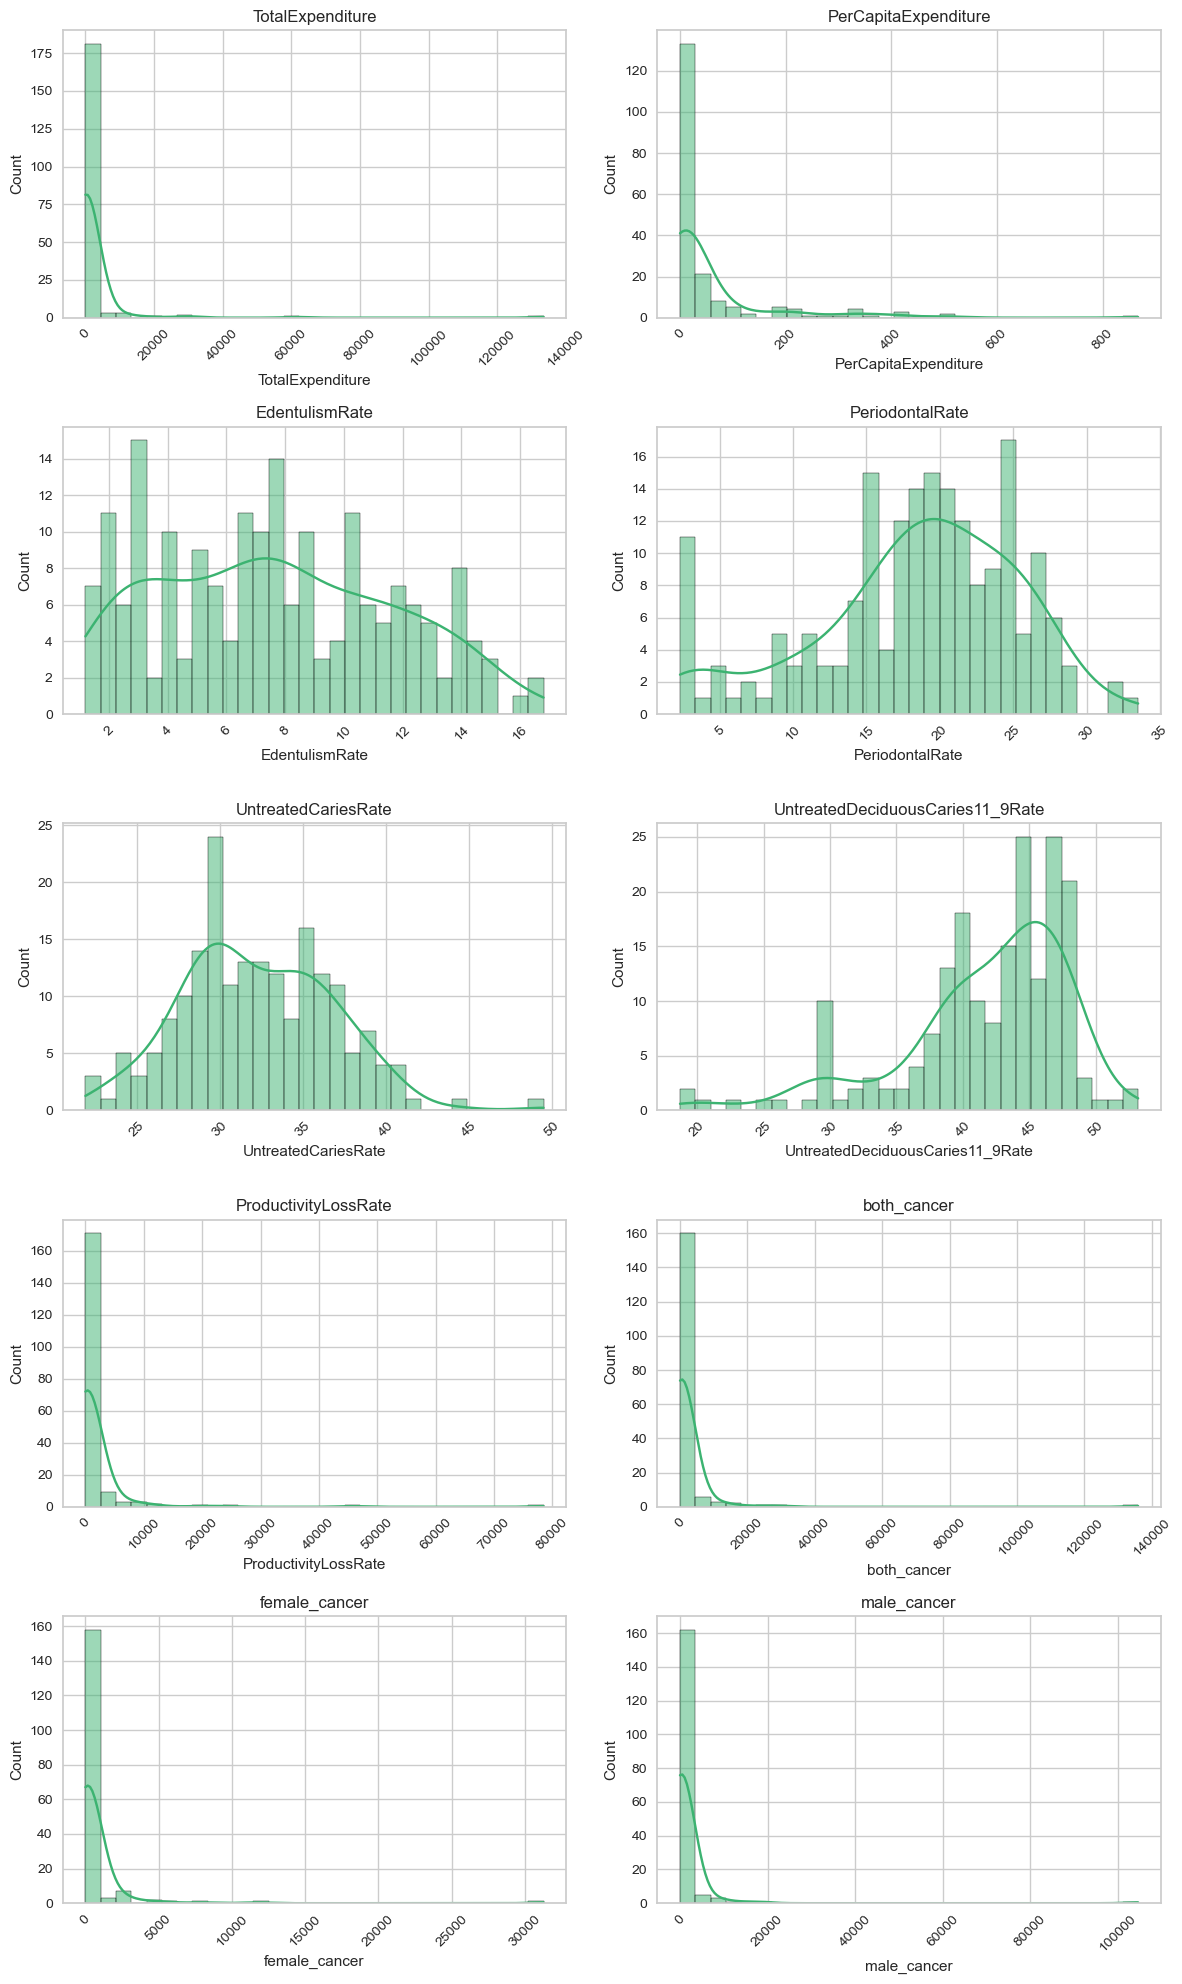

In [81]:
numeric_cols = [col for col in df.columns if col not in ['Period', 'Location']]
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    
    # Histogram + KDE (trendline)
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='mediumseagreen', edgecolor='black')
    
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# Fazla bo≈ü subplotlarƒ± kaldƒ±r
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows*n_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [82]:
#En √ßok harcama yapan 10 √ºlke
top_total_expenditure = df.sort_values("TotalExpenditure", ascending=False).head(10)

print("En √ßok harcama yapan 10 √ºlke:")
print(top_total_expenditure[["Location", "TotalExpenditure", "PerCapitaExpenditure"]].to_string(index=False))


En √ßok harcama yapan 10 √ºlke:
                                     Location  TotalExpenditure  PerCapitaExpenditure
                        UnitedStatesofAmerica          133505.8                 405.5
                                        China           61548.6                  44.0
                                      Germany           30877.3                 372.2
                                        Japan           28733.6                 227.7
                                        Italy           19123.0                 316.8
                                       Canada           12829.1                 342.5
                                       France           12666.0                 195.4
UnitedKingdomofGreatBritainandNorthernIreland            9576.9                 143.2
                                        Spain            8306.3                 178.0
                                    Australia            7370.3                 288.3


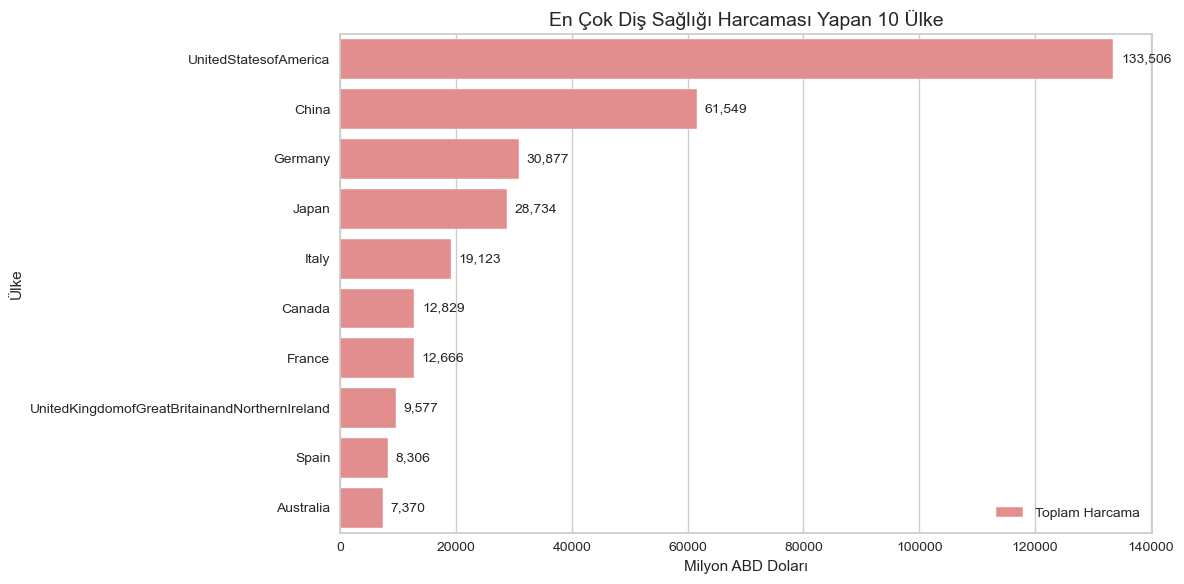

In [83]:
# En √ßok harcama yapan 10 √ºlkeyi se√ß
top_total_expenditure = df.sort_values("TotalExpenditure", ascending=False).head(10)

# Grafik boyutu ve stil
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Barplot
ax = sns.barplot(
    x="TotalExpenditure",
    y="Location",
    data=top_total_expenditure,
    color="lightcoral",
    label="Toplam Harcama"
)

# √áubuklarƒ±n √ºzerine deƒüerleri yaz
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + (0.01 * top_total_expenditure["TotalExpenditure"].max()),  # barƒ±n biraz saƒüƒ±na
        p.get_y() + p.get_height() / 2,
        f"{width:,.0f}",  # sayƒ±yƒ± binlik ayƒ±rƒ±cƒ± ile yaz
        ha="left", va="center", fontsize=10
    )

# Ba≈ülƒ±k ve a√ßƒ±klamalar
plt.title("En √áok Di≈ü Saƒülƒ±ƒüƒ± Harcamasƒ± Yapan 10 √úlke", fontsize=14)
plt.xlabel("Milyon ABD Dolarƒ±")
plt.ylabel("√úlke")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [84]:
# En d√º≈ü√ºk harcama yapan 10 √ºlke
low_total_expenditure = df.sort_values("TotalExpenditure", ascending=True).head(10)
print("\nEn d√º≈ü√ºk harcama yapan 10 √ºlke:")
print(low_total_expenditure[["Location", "TotalExpenditure", "PerCapitaExpenditure"]])


En d√º≈ü√ºk harcama yapan 10 √ºlke:
                     Location  TotalExpenditure  PerCapitaExpenditure
21                      Kenya               0.0                   0.0
173                  Cambodia               0.0                   0.0
18                     Gambia               0.0                   0.0
88                       Iraq               0.0                   0.0
31                      Niger               0.0                   0.0
157                    Bhutan               0.0                   0.1
42   UnitedRepublicofTanzania               0.1                   0.0
188                    Tuvalu               0.1                   6.8
190                   Vanuatu               0.1                   0.5
14                   Ethiopia               0.1                   0.0


In [85]:
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate","ProductivityLossRate"]

# √úlkeleri toplam harcama sƒ±rasƒ±na g√∂re g√∂ster
df_top_spenders_health = top_total_expenditure[["Location"] + health_cols]
print("\nEn √ßok harcama yapan 10 √ºlkenin saƒülƒ±k g√∂stergeleri:")

# Tek satƒ±rda g√∂stermek i√ßin
print(df_top_spenders_health.to_string(index=False))



En √ßok harcama yapan 10 √ºlkenin saƒülƒ±k g√∂stergeleri:
                                     Location  EdentulismRate  PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  ProductivityLossRate
                        UnitedStatesofAmerica            10.2             15.7                 24.3                              42.6               78468.5
                                        China             5.7             17.5                 24.6                              47.2               45713.1
                                      Germany            11.7             27.4                 31.7                              29.1               19395.9
                                        Japan            11.7             20.6                 25.8                              39.5               23663.0
                                        Italy            12.9             18.2                 29.6                              36.1                9541.6
     

C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\889393609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


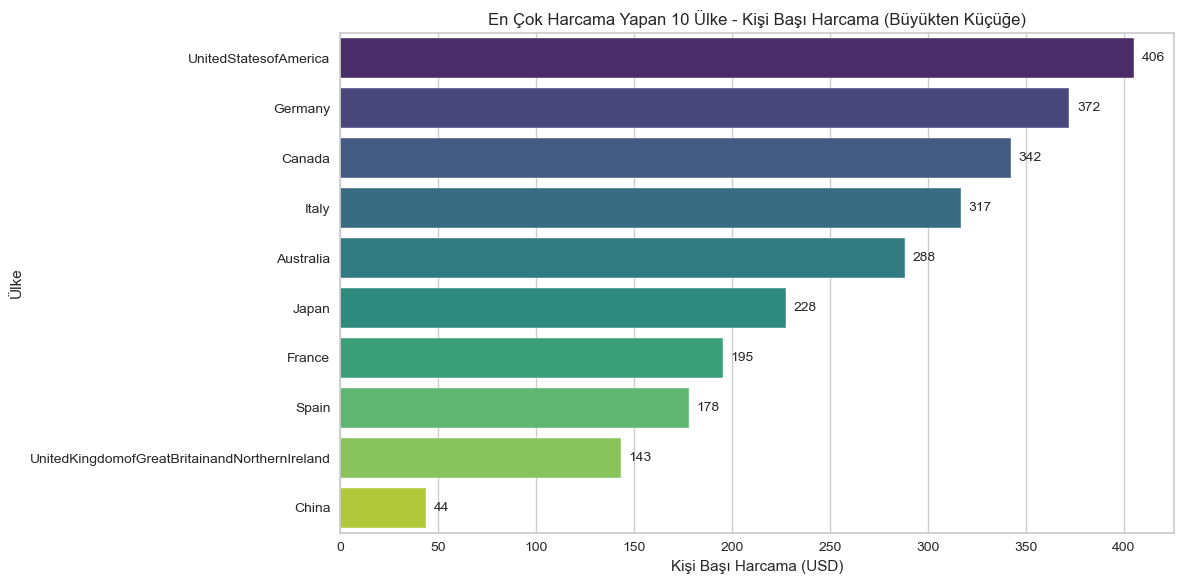

In [86]:
# Ki≈üi ba≈üƒ± harcamaya g√∂re b√ºy√ºkten k√º√ß√ºƒüe sƒ±ralama
sorted_df = top_total_expenditure.sort_values("PerCapitaExpenditure", ascending=False)

# Grafik
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="PerCapitaExpenditure",
    y="Location",
    data=sorted_df,
    palette="viridis"
)

# √áubuklarƒ±n √ºzerine deƒüerleri yaz
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + (0.01 * sorted_df["PerCapitaExpenditure"].max()),  # barƒ±n biraz saƒüƒ±na
        p.get_y() + p.get_height() / 2,
        f"{width:,.0f}",  # sayƒ±yƒ± binlik ayƒ±rƒ±cƒ± ile yaz
        ha="left", va="center", fontsize=10
    )

# Ba≈ülƒ±k ve eksenler
plt.title("En √áok Harcama Yapan 10 √úlke - Ki≈üi Ba≈üƒ± Harcama (B√ºy√ºkten K√º√ß√ºƒüe)")
plt.xlabel("Ki≈üi Ba≈üƒ± Harcama (USD)")
plt.ylabel("√úlke")
plt.tight_layout()
plt.show()


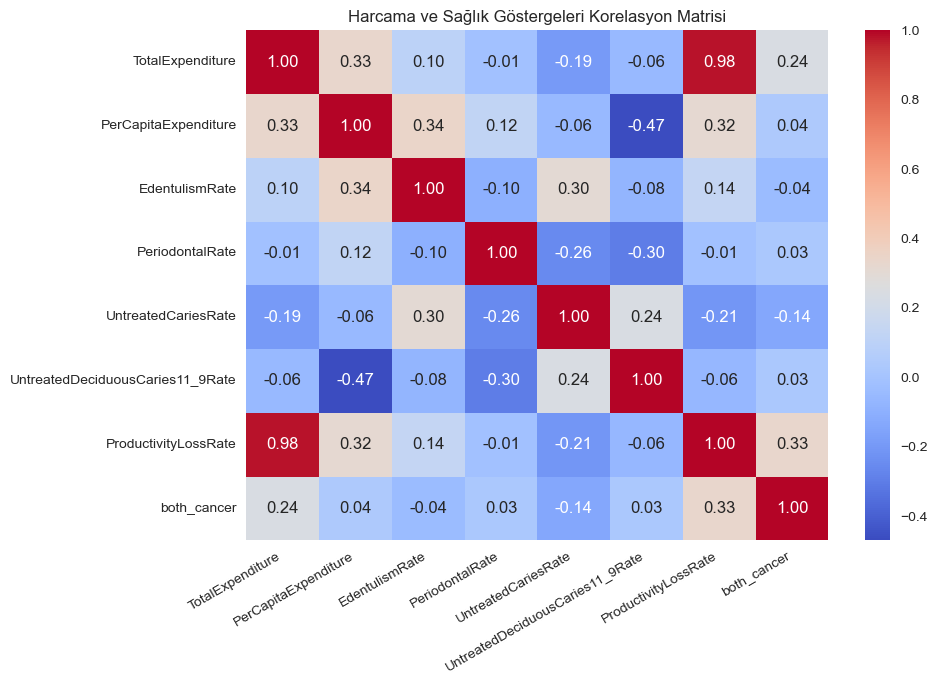

In [87]:
# Sayƒ±sal s√ºtunlarƒ± se√ß
numeric_for_corr = [col for col in df.columns if col not in ['Location','female_cancer', 'male_cancer']]

# Korelasyon matrisi
corr = df[numeric_for_corr].corr()

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 7))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

# X ekseni etiketlerini 45 derece d√∂nd√ºr
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.title("Harcama ve Saƒülƒ±k G√∂stergeleri Korelasyon Matrisi")
plt.tight_layout()
plt.show()


In [88]:
# TotalExpenditure'e g√∂re 3 gruba ayƒ±r (Low, Medium, High)
df["ExpenditureGroup"] = pd.qcut(df["TotalExpenditure"], 3, labels=["Low", "Medium", "High"])

# Gruplara g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate", "ProductivityLossRate"]


# Harcama gruplarƒ±na g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±
grouped_health = df.groupby("ExpenditureGroup")[health_cols].mean()

# Daha okunaklƒ± ve g√∂rsel olarak zengin tablo
styled_table = grouped_health.style\
    .format("{:.4f}")\
    .background_gradient(cmap="YlGnBu")\
    .set_caption("Harcama Gruplarƒ±na G√∂re Saƒülƒ±k G√∂stergeleri Ortalamalarƒ±")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'black'), ('font-size', '14px'), ('font-weight', 'bold')]
    }])

styled_table

C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\247405072.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_health = df.groupby("ExpenditureGroup")[health_cols].mean()


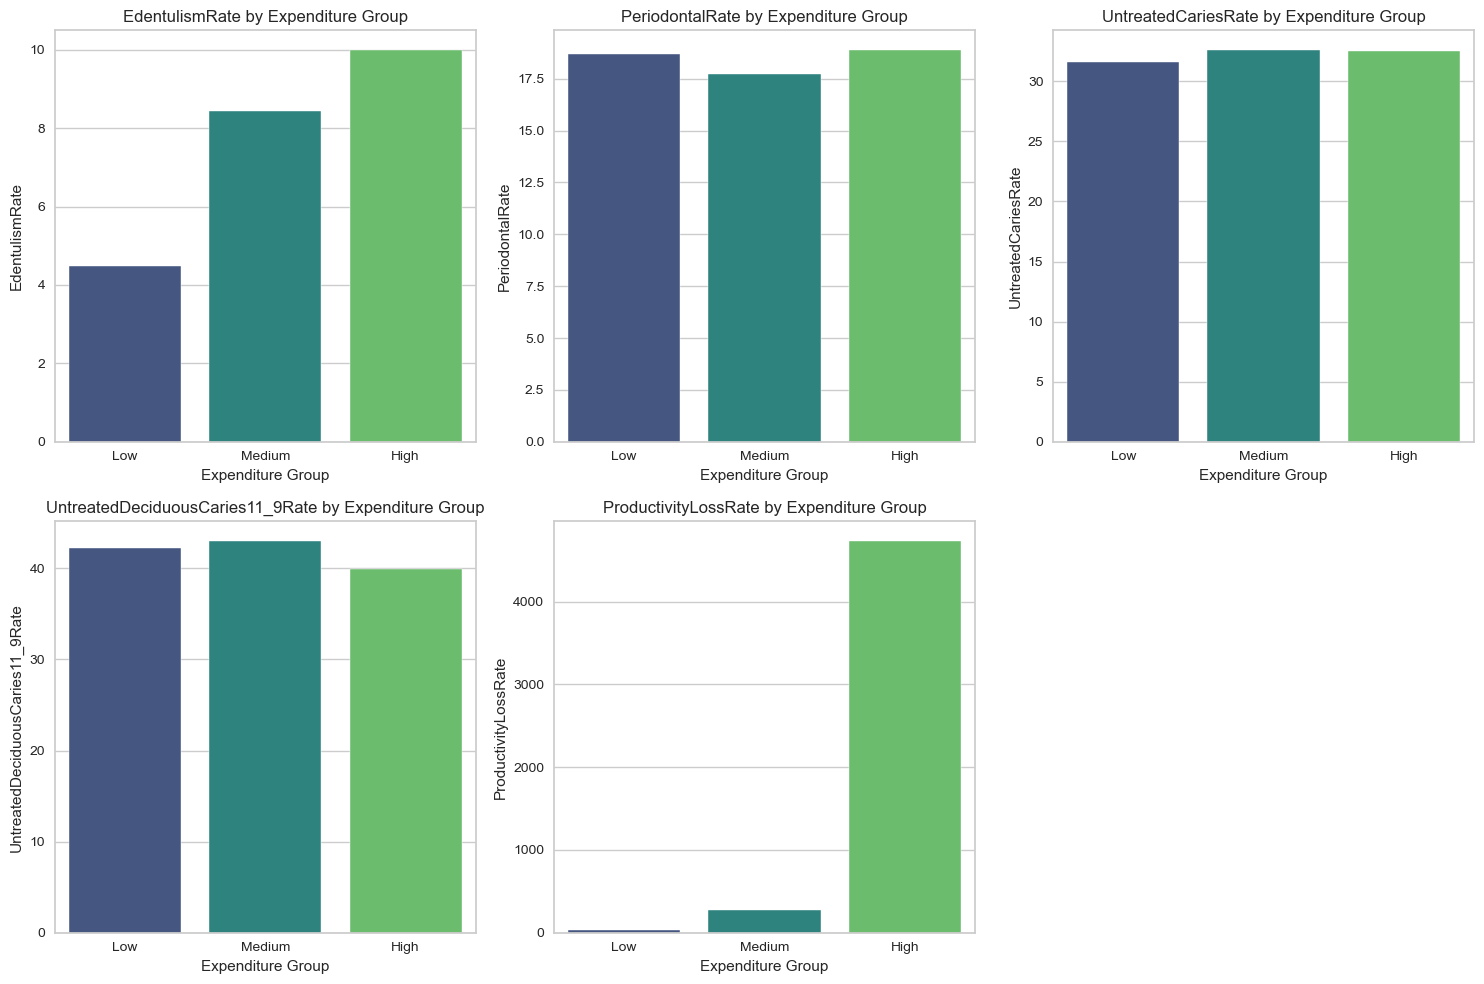

In [128]:
# Ayar: ka√ß s√ºtun olsun
n_cols = 3
n_rows = (len(health_cols) + n_cols - 1) // n_cols  # Satƒ±r sayƒ±sƒ±nƒ± otomatik ayarla

# Grafik alanƒ±
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# axes'i her durumda d√ºzle≈ütir (tek subplot olsa bile listeye √ßevir)
if isinstance(axes, plt.Axes):
    axes = [axes]
else:
    axes = axes.flatten()

# Her g√∂sterge i√ßin bar plot
for i, col in enumerate(health_cols):
    sns.barplot(
        x=grouped_health.index,
        y=grouped_health[col],
        palette="viridis",
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Expenditure Group")
    axes[i].set_xlabel("Expenditure Group")
    axes[i].set_ylabel(col)

# Fazla bo≈ü eksenleri kaldƒ±r (varsa)
for j in range(len(health_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


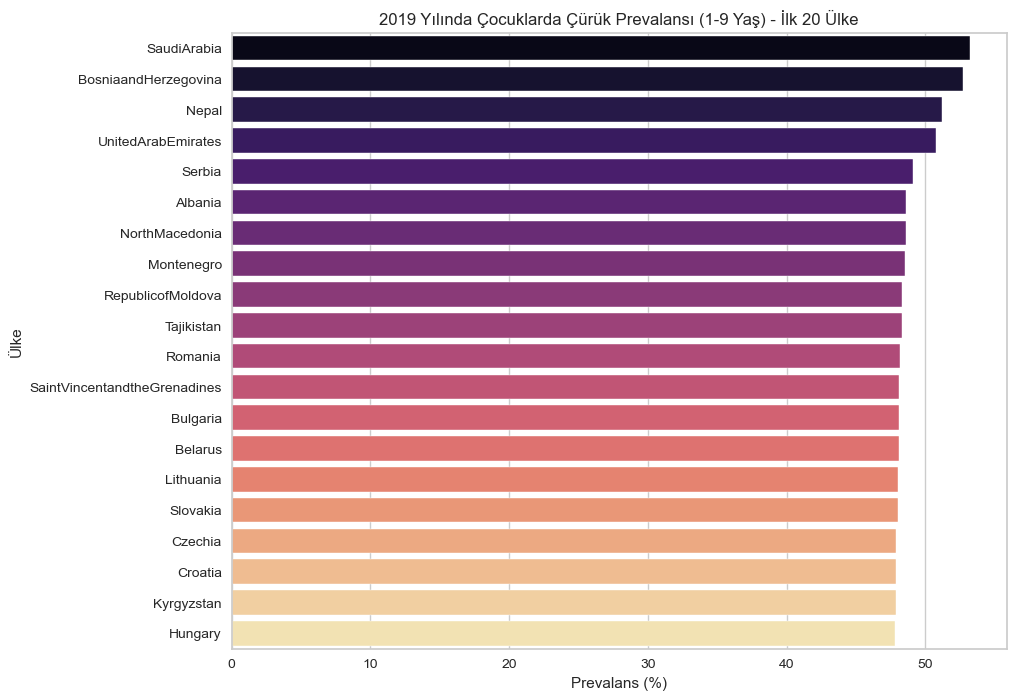

In [129]:
#2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - ƒ∞lk 20 √úlke
# En y√ºksek 20 √ºlkeyi se√ß
top20_caries = df.nlargest(20, "UntreatedDeciduousCaries11_9Rate")

plt.figure(figsize=(10,8))
sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=top20_caries, palette="magma")
plt.title("2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - ƒ∞lk 20 √úlke")
plt.xlabel("Prevalans (%)")
plt.ylabel("√úlke")
plt.show()


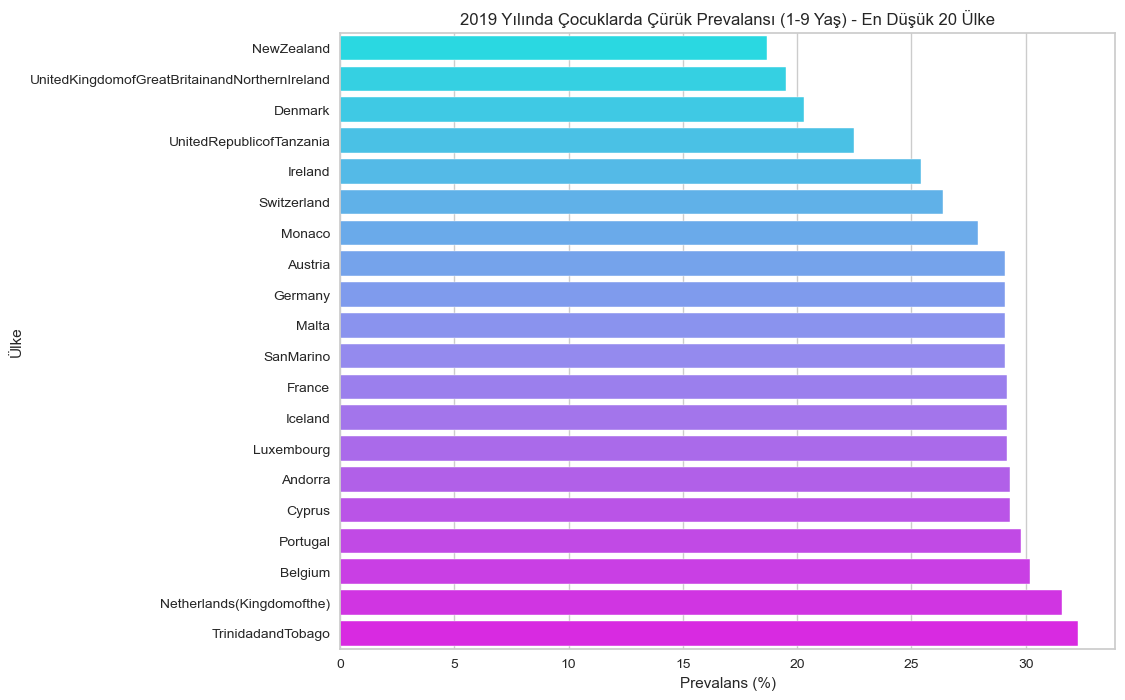

In [130]:
# En d√º≈ü√ºk 20 √ºlkeyi se√ß
bottom20_caries = df.nsmallest(20, "UntreatedDeciduousCaries11_9Rate")

plt.figure(figsize=(10,8))
sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=bottom20_caries, palette="cool")
plt.title("2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - En D√º≈ü√ºk 20 √úlke")
plt.xlabel("Prevalans (%)")
plt.ylabel("√úlke")
plt.show()


In [92]:
countries = ["Germany", "T√ºrkiye"]
df_countries = df[df["Location"].isin(countries)]

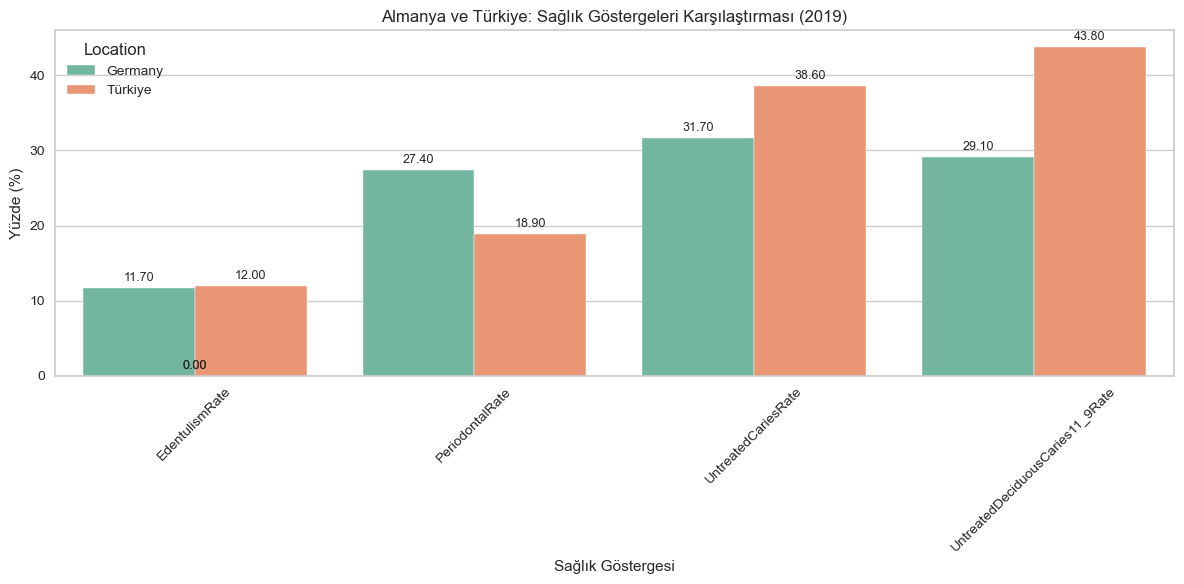

In [93]:
# Almanya ve T√ºrkiye: Saƒülƒ±k G√∂stergeleri Kar≈üƒ±la≈ütƒ±rmasƒ± (2019)
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate"]

plt.figure(figsize=(12,6))
df_melted = df_countries.melt(id_vars=["Location"], value_vars=health_cols,
                              var_name="HealthIndicator", value_name="Value")

ax = sns.barplot(x="HealthIndicator", y="Value", hue="Location", data=df_melted, palette="Set2")

# Her barƒ±n √ºst√ºne deƒüerleri yaz
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2., 
            y=height + 0.5,  
            s=f'{height:.2f}',  
            ha='center', va='bottom', fontsize=9)

plt.title("Almanya ve T√ºrkiye: Saƒülƒ±k G√∂stergeleri Kar≈üƒ±la≈ütƒ±rmasƒ± (2019)")
plt.xlabel("Saƒülƒ±k G√∂stergesi")
plt.ylabel("Y√ºzde (%)")  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

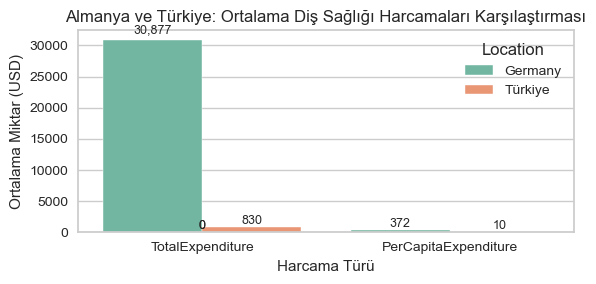

In [94]:
# Kar≈üƒ±la≈ütƒ±rƒ±lacak deƒüi≈ükenler
expenditure_cols = ["TotalExpenditure", "PerCapitaExpenditure"]

# Almanya ve T√ºrkiye i√ßin ortalama deƒüerleri hesapla
df_avg = df_countries.groupby("Location")[expenditure_cols].mean().reset_index()

# Veriyi uzun formata √ßevir
df_avg_melted = df_avg.melt(
    id_vars="Location",
    value_vars=expenditure_cols,
    var_name="ExpenditureType",
    value_name="AverageValue"
)

# Grafik
plt.figure(figsize=(6, 3))
ax = sns.barplot(
    x="ExpenditureType",
    y="AverageValue",
    hue="Location",
    data=df_avg_melted,
    palette="Set2"
)

# Her barƒ±n √ºst√ºne Y deƒüerlerini yaz
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2.,
        y=height + 0.02*height,  # barƒ±n biraz √ºst√ºne
        s=f'{height:,.0f}',       # tam sayƒ± formatƒ±nda
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title("Almanya ve T√ºrkiye: Ortalama Di≈ü Saƒülƒ±ƒüƒ± Harcamalarƒ± Kar≈üƒ±la≈ütƒ±rmasƒ±")
plt.xlabel("Harcama T√ºr√º")
plt.ylabel("Ortalama Miktar (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



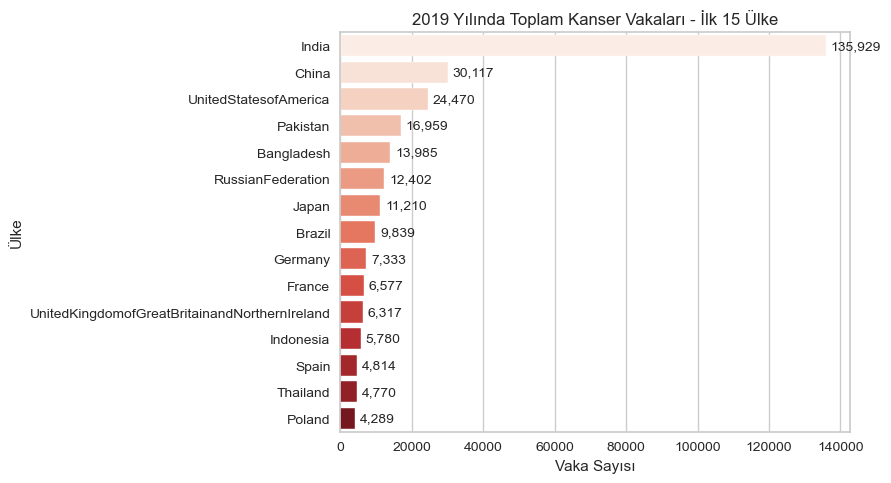

In [131]:
# Toplam kanser vaka sayƒ±sƒ±na g√∂re ilk 15 √ºlke
top15_cancer = df.nlargest(15, "both_cancer")

plt.figure(figsize=(9,5))
ax = sns.barplot(x="both_cancer", y="Location", data=top15_cancer, palette="Reds")

# √áubuklarƒ±n √ºzerine deƒüerleri ekle
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + (0.01 * top15_cancer["both_cancer"].max()),  # barƒ±n biraz saƒüƒ±na
        p.get_y() + p.get_height() / 2,
        f"{int(width):,}",  # binlik ayƒ±rƒ±cƒ± ile tam sayƒ±
        ha="left", va="center", fontsize=10
    )

plt.title("2019 Yƒ±lƒ±nda Toplam Kanser Vakalarƒ± - ƒ∞lk 15 √úlke")
plt.xlabel("Vaka Sayƒ±sƒ±")
plt.ylabel("√úlke")
plt.tight_layout()
plt.show()



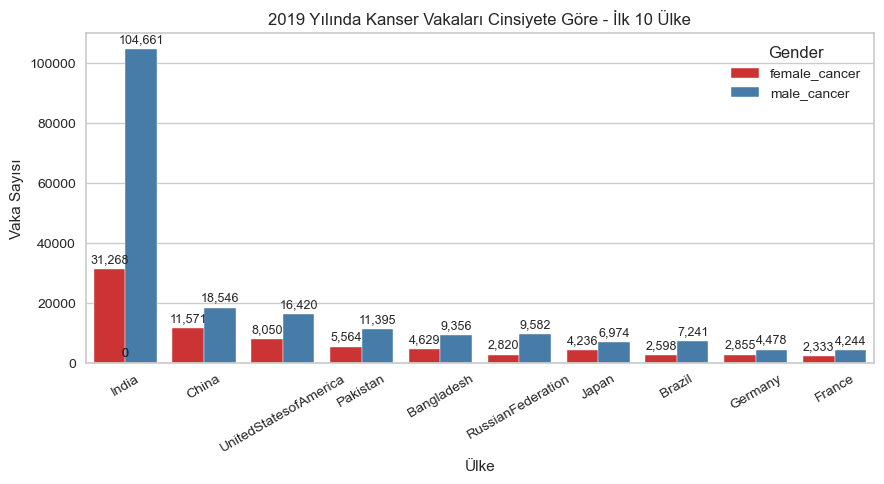

In [96]:
# Sadece ilk 10 √ºlke ile √∂rnek
top10_cancer = df.nlargest(10, "both_cancer")
cancer_cols = ["female_cancer", "male_cancer"]

df_melted = top10_cancer.melt(
    id_vars=["Location"], value_vars=cancer_cols,
    var_name="Gender", value_name="Cases"
)

plt.figure(figsize=(9,5))
ax = sns.barplot(x="Location", y="Cases", hue="Gender", data=df_melted, palette="Set1")

# √áubuklarƒ±n √ºzerine deƒüer yazma
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,  # barƒ±n ortasƒ±na hizala
        height + (0.01 * df_melted["Cases"].max()),  # biraz yukarƒ±sƒ±na yaz
        f"{int(height):,}",  # binlik ayra√ßlƒ± sayƒ±
        ha="center", va="bottom", fontsize=9
    )

plt.title("2019 Yƒ±lƒ±nda Kanser Vakalarƒ± Cinsiyete G√∂re - ƒ∞lk 10 √úlke")
plt.xlabel("√úlke")
plt.ylabel("Vaka Sayƒ±sƒ±")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

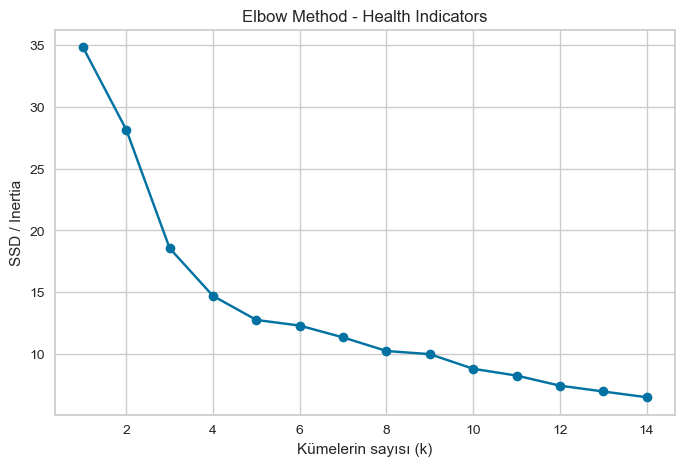

In [133]:
#Aƒüƒ±z Saƒülƒ±ƒüƒ± K√ºme Profilleri (K-means)

health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate", "ProductivityLossRate"]

# √ñl√ßekleme
scaler = MinMaxScaler()
X_health_scaled = scaler.fit_transform(df[health_cols])

# Elbow Method i√ßin SSD hesaplama
ssd = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_health_scaled)   # Fit et
    ssd.append(kmeans.inertia_)   # SSD'yi ekle

# G√∂rselle≈ütirme
plt.figure(figsize=(8,5))
plt.plot(K, ssd, 'bo-')
plt.xlabel('K√ºmelerin sayƒ±sƒ± (k)')
plt.ylabel('SSD / Inertia')
plt.title('Elbow Method - Health Indicators')
plt.show()

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

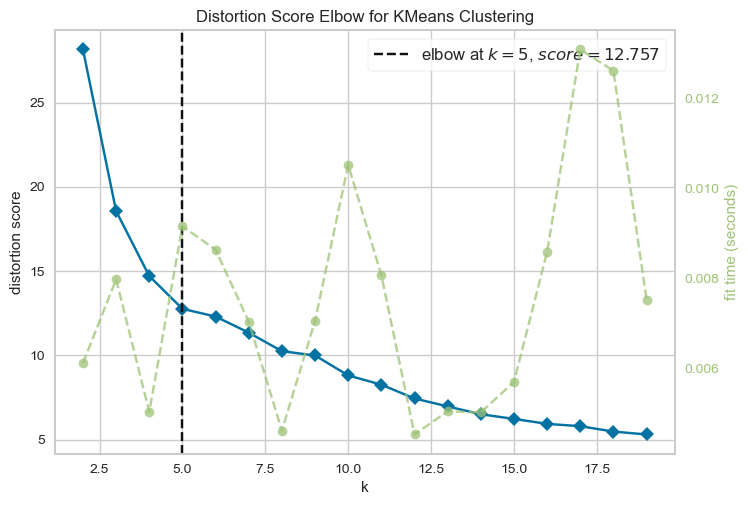

Optimal k√ºme sayƒ±sƒ±: 5


In [98]:
# √ñl√ßekleme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[health_cols])

# KMeans modeli
kmeans = KMeans(random_state=42)

# K-Elbow (2-20 arasƒ±nda K denemesi)
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(X_scaled) 
elbow.show()

# Optimal K
print("Optimal k√ºme sayƒ±sƒ±:", elbow.elbow_value_)

In [99]:
# √ñl√ßekleme
scaler = MinMaxScaler()
X_health_scaled = scaler.fit_transform(df[health_cols])

# KMeans fit
kmeans = KMeans(n_clusters=elbow.elbow_value_,random_state=42)
kmeans.fit(X_health_scaled)

# K√ºme sayƒ±sƒ±
print("K√ºme sayƒ±sƒ±:", kmeans.n_clusters)

# K√ºme merkezleri (√∂l√ßeklenmi≈ü deƒüerler)
print("K√ºme merkezleri:\n", kmeans.cluster_centers_)

# Her verinin etiketi (hangi segmentte olduƒüu)
df["kmeans_cluster_no"] = kmeans.labels_ + 1

# ƒ∞lk 5 satƒ±r
df.head()

K√ºme sayƒ±sƒ±: 5
K√ºme merkezleri:
 [[0.38286713 0.61400058 0.30344203 0.714361   0.04516839]
 [0.29487179 0.17775468 0.39385037 0.76788092 0.00375052]
 [0.09722222 0.70474664 0.29408213 0.61297447 0.00336623]
 [0.6811491  0.56813865 0.36486849 0.3324745  0.04997081]
 [0.69261294 0.49496337 0.5218254  0.8005521  0.01179283]]


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Location  TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
0       Angola              70.2                   2.3             4.0   
1      Burundi               1.3                   0.1             2.0   
2        Benin               3.3                   0.3             2.9   
3  BurkinaFaso               4.6                   0.2             1.9   
4     Botswana              57.4                  24.1             7.5   

   PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
0             23.9                 27.2                              37.8   
1             19.2                 31.7                              41.6   
2             27.1                 29.5                              39.6   
3             27.4                 27.5                              40.3   
4             26.3                 32.7                              37.6   

   ProductivityLossRate  both_cancer  female_cancer  male_cancer  \
0                 195.8        482.0          166.0        316.0   
1                   5.3         92.0           30.0         62.0   
2                  30.0         74.0           42.0         32.0   
3                  30.8        179.0           55.0        124.0   
4                  59.2         60.0            8.0         52.0   

  ExpenditureGroup  kmeans_cluster_no  
0           Medium                  3  
1              Low                  3  
2              Low                  3  
3              Low                  3  
4           Medium                  1

In [100]:
# Sadece sayƒ±sal s√ºtunlar
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# kmeans_cluster_no'yu √ßƒ±kar
if "kmeans_cluster_no" in numeric_cols:
    numeric_cols.remove("kmeans_cluster_no")

# K√ºme bazlƒ± √∂zet
summary = df.groupby("kmeans_cluster_no")[numeric_cols].agg(["count","mean","median"])

# Multi-index s√ºtunlarƒ± d√ºzle≈ütir
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# Daha okunaklƒ± yapmak i√ßin sayƒ±larƒ± yuvarla
summary = summary.round(1)

# G√∂ster
summary


TotalExpenditure_count  TotalExpenditure_mean  \
kmeans_cluster_no                                                  
1                                      44                 5202.2   
2                                      37                  288.9   
3                                      42                   10.8   
4                                      27                 4781.9   
5                                      42                  427.1   

                   TotalExpenditure_median  PerCapitaExpenditure_count  \
kmeans_cluster_no                                                        
1                                     62.0                          44   
2                                      6.9                          37   
3                                      2.9                          42   
4                                    826.5                          27   
5                                    123.6                          42   

                   PerCapitaExpenditure_mean  PerCapitaExpenditure_median  \
kmeans_cluster_no                                                           
1                                       57.6                         23.7   
2                                       11.6                          3.5   
3                                        0.6                          0.2   
4                                      225.4                        195.4   
5                                       35.0                         15.8   

                   EdentulismRate_count  EdentulismRate_mean  \
kmeans_cluster_no                                              
1                                    44                  7.2   
2                                    37                  5.8   
3                                    42                  2.7   
4                                    27                 11.8   
5                                    42                 12.0   

                   EdentulismRate_median  PeriodontalRate_count  ...  \
kmeans_cluster_no                                                ...   
1                                    7.4                     44  ...   
2                                    6.0                     37  ...   
3                                    2.8                     42  ...   
4                                   11.7                     27  ...   
5                                   12.0                     42  ...   

                   ProductivityLossRate_median  both_cancer_count  \
kmeans_cluster_no                                                   
1                                        118.7                 38   
2                                         37.0                 29   
3                                         26.0                 41   
4                                       1384.4                 24   
5                                        312.5                 42   

                   both_cancer_mean  both_cancer_median  female_cancer_count  \
kmeans_cluster_no                                                              
1                            2091.1                92.5                   38   
2                             739.1               277.0                   29   
3                            4280.6               166.0                   41   
4                            1947.9               584.0                   24   
5                            1106.8               261.5                   42   

                   female_cancer_mean  female_cancer_median  \
kmeans_cluster_no                                             
1                               782.9                  32.0   
2                               255.8                 138.0   
3                              1100.7                  55.0   
4                               738.8                 199.0   
5                               298.7                 101.5   

                   male_cancer_count  male

C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\3146770165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='kmeans_cluster_no', data=df, palette='Set2')


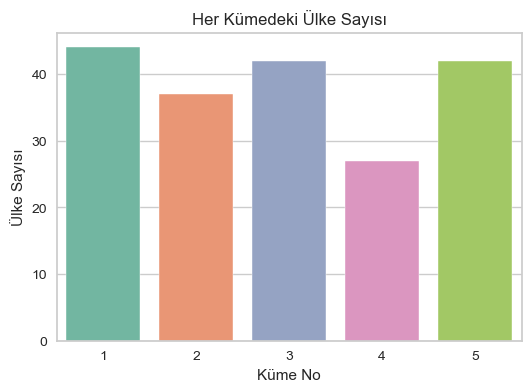

In [101]:
# Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='kmeans_cluster_no', data=df, palette='Set2')
plt.title("Her K√ºmedeki √úlke Sayƒ±sƒ±")
plt.xlabel("K√ºme No")
plt.ylabel("√úlke Sayƒ±sƒ±")
plt.show()

In [102]:
# K√ºme bazƒ±nda √ºlkeler
cluster_countries = df.groupby("kmeans_cluster_no")["Location"].apply(list)
cluster_countries

kmeans_cluster_no
1    [Botswana, CentralAfricanRepublic, Lesotho, Es...
2    [Mauritius, SierraLeone, Seychelles, Afghanist...
3    [Angola, Burundi, Benin, BurkinaFaso, Coted'Iv...
4    [Namibia, Colombia, TrinidadandTobago, Andorra...
5    [Algeria, Bolivia(PlurinationalStateof), Brazi...
Name: Location, dtype: object

In [103]:
# K√ºme bazƒ±nda ortalama deƒüerler
cluster_means = df.groupby("kmeans_cluster_no")[numeric_cols].mean()
cluster_means

TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
kmeans_cluster_no                                                           
1                       5202.229545             57.565909        7.172727   
2                        288.929730             11.605405        5.800000   
3                         10.807143              0.602381        2.716667   
4                       4781.881481            225.388889       11.825926   
5                        427.126190             35.033333       12.004762   

                   PeriodontalRate  UntreatedCariesRate  \
kmeans_cluster_no                                         
1                        21.456818            30.275000   
2                         7.845946            32.770270   
3                        24.288095            30.016667   
4                        20.025926            31.970370   
5                        17.742857            36.302381   

                   UntreatedDeciduousCaries11_9Rate  ProductivityLossRate  \
kmeans_cluster_no                                                           
1                                         43.345455           3544.390909   
2                                         45.191892            294.397297   
3                                         39.847619            264.242857   
4                                         30.170370           3921.229630   
5                                         46.319048            925.464286   

                   both_cancer  female_cancer  male_cancer  
kmeans_cluster_no                                           
1                  2091.105263     782.894737  1308.210526  
2                   739.137931     255.758621   483.379310  
3                  4280.609756    1100.658537  3179.951220  
4                  1947.916667     738.750000  1209.166667  
5                  1106.809524     298.714286   808.095238

In [104]:
# Her k√ºmedeki √ºlkeleri listele
clusters_countries = df.groupby("kmeans_cluster_no")["Location"].apply(list)

# Her k√ºmeyi tek tek yazdƒ±ralƒ±m
for cluster, countries in clusters_countries.items():
    print(f"\nüìå K√ºme {cluster} ({len(countries)} √ºlke):")
    print(", ".join(countries))


üìå K√ºme 1 (44 √ºlke):
Botswana, CentralAfricanRepublic, Lesotho, Eswatini, SouthAfrica, Zimbabwe, Argentina, AntiguaandBarbuda, Bahamas, Belize, Barbados, Canada, CostaRica, Dominica, DominicanRepublic, Grenada, Guatemala, Guyana, Honduras, Haiti, Jamaica, SaintKittsandNevis, SaintLucia, Mexico, Nicaragua, Panama, Paraguay, ElSalvador, Suriname, UnitedStatesofAmerica, SaintVincentandtheGrenadines, Venezuela(BolivarianRepublicof), UnitedArabEmirates, Bahrain, Egypt, Iran(IslamicRepublicof), Kuwait, Libya, Qatar, Indonesia, Thailand, China, RepublicofKorea, Singapore

üìå K√ºme 2 (37 √ºlke):
Mauritius, SierraLeone, Seychelles, Afghanistan, Iraq, Jordan, Oman, SaudiArabia, Sudan, Yemen, Spain, Tajikistan, Uzbekistan, SriLanka, Maldives, Myanmar, Nepal, DemocraticPeople'sRepublicofKorea, Timor-Leste, BruneiDarussalam, Fiji, Micronesia(FederatedStatesof), Cambodia, Kiribati, LaoPeople'sDemocraticRepublic, MarshallIslands, Malaysia, Nauru, Philippines, Palau, PapuaNewGuinea, SolomonIsla

üìå K√ºme 1 (44 √ºlke)

√úlkeler: Afrika‚Äônƒ±n g√ºneyi (Botswana, G√ºney Afrika, Zimbabve), Kuzey Afrika‚Äôdan bazƒ± √ºlkeler (Mƒ±sƒ±r, Libya), Kuzey Amerika (ABD, Kanada, Meksika), Orta Amerika ve Karayipler (Dominik, Jamaika, K√ºba hari√ß bir√ßok ada √ºlkesi), G√ºney Amerika‚Äôdan Arjantin, Venezuela, Paraguay, Asya‚Äôdan √áin, Kore, Endonezya, Tayland, Singapur, K√∂rfez √ºlkeleri (BAE, Katar, Kuveyt, Bahreyn).

Genel √ñzellik:

Y√ºksek saƒülƒ±k harcamalarƒ±, g√∂rece daha iyi aƒüƒ±z saƒülƒ±ƒüƒ±, g√º√ßl√º ekonomi ve saƒülƒ±k altyapƒ±sƒ±.

ABD, Kanada, Singapur, √áin gibi y√ºksek gelirli √ºlkeler ile bazƒ± petrol zengini Orta Doƒüu √ºlkeleri aynƒ± k√ºmeye d√º≈üm√º≈ü.

K√ºme 1 (ABD, √áin, K√∂rfez, vs.)

√áok y√ºksek saƒülƒ±k harcamasƒ± (5202), ama ki≈üi ba≈üƒ± d√º≈ü√ºk (57.6) ‚Üí b√ºy√ºk n√ºfuslu √ºlkeler (√áin, ABD).

Aƒüƒ±z saƒülƒ±ƒüƒ± orta d√ºzeyde (Edentulism %7.1).

Kanser y√ºk√º y√ºksek (2091).

üìå K√ºme 2 (37 √ºlke)

√úlkeler: G√ºney Asya (Afganistan, Nepal, Sri Lanka), Orta Asya (Tacikistan, √ñzbekistan), Ortadoƒüu (Irak, Yemen, Suudi Arabistan), G√ºneydoƒüu Asya ve Pasifik √ºlkeleri (Malezya, Filipinler, Fiji, Vietnam).

Genel √ñzellik:

Orta gelir grubu, saƒülƒ±k g√∂stergeleri ve harcama seviyeleri orta seviyede.

Saƒülƒ±k sistemleri geli≈ümekte, ancak b√∂lgesel e≈üitsizlikler mevcut.

K√ºme 2 (Ortadoƒüu + Pasifik + Asya geli≈ümekte)

D√º≈ü√ºk harcama (289 toplam, ki≈üi ba≈üƒ± 11.6).

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂rece iyi (Edentulism %5.8, Periodontal %7.8).

Kanser y√ºk√º d√º≈ü√ºk (739).

üìå K√ºme 3 (42 √ºlke)

√úlkeler: B√ºy√ºk oranda Afrika √ºlkeleri (Kenya, Nijerya, Tanzanya, Etiyopya, Senegal, vs.), ayrƒ±ca Pakistan, Hindistan, Banglade≈ü, Bhutan.

Genel √ñzellik:

D√º≈ü√ºk saƒülƒ±k harcamasƒ±, aƒüƒ±z saƒülƒ±ƒüƒ± sorunlarƒ± daha y√ºksek.

Geli≈ümekte olan ve d√º≈ü√ºk gelirli √ºlkeler.

En kƒ±rƒ±lgan grup diyebiliriz.

K√ºme 3 (Afrika + Hindistan, Pakistan)

√áok d√º≈ü√ºk harcama (10.8 toplam, ki≈üi ba≈üƒ± 0.6).

Edentulism d√º≈ü√ºk (%2.7) ama bu saƒülƒ±k hizmeti yetersizliƒüinden olabilir (raporlanmamƒ±≈ü vaka olasƒ±lƒ±ƒüƒ±).

Periodontal √ßok y√ºksek (%24) ‚Üí ciddi sorun.

Kanser y√ºk√º √ßok y√ºksek (4280, erkeklerde 3180!) ‚Üí saƒülƒ±k hizmetlerine eri≈üim d√º≈ü√ºk.

üìå K√ºme 4 (27 √ºlke)

√úlkeler: Avrupa Birliƒüi ve Batƒ± Avrupa √ºlkeleri (Almanya, Fransa, ƒ∞talya, ƒ∞skandinav √ºlkeleri, Benel√ºks), ayrƒ±ca Avustralya, Japonya, Yeni Zelanda.

Genel √ñzellik:

En geli≈ümi≈ü saƒülƒ±k sistemleri, y√ºksek ki≈üi ba≈üƒ± saƒülƒ±k harcamasƒ±.

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri en iyi seviyede.

Bu k√ºme aslƒ±nda y√ºksek gelirli OECD √ºlkeleri k√ºmesi.

K√ºme 4 (Batƒ± Avrupa + OECD)

√áok y√ºksek harcama (4781, ki≈üi ba≈üƒ± 225).

Edentulism en y√ºksek (%11.8) ‚Üí ya≈ülƒ± n√ºfus etkisi.

Kanser y√ºk√º orta (1947).

Saƒülƒ±k sistemi g√º√ßl√º ama ya≈ülanma kaynaklƒ± aƒüƒ±z saƒülƒ±ƒüƒ± sorunlarƒ± artƒ±yor.

üìå K√ºme 5 (42 √ºlke)

√úlkeler: Doƒüu Avrupa (Rusya, Ukrayna, Polonya, Romanya, Balkan √ºlkeleri), Kuzey Afrika (Cezayir, Tunus, Fas), Latin Amerika (Brezilya, ≈ûili, Peru, Uruguay), T√ºrkiye, ƒ∞srail, ƒ∞sve√ß, Kazakistan.

Genel √ñzellik:

Orta-y√ºksek harcama d√ºzeyi, aƒüƒ±z saƒülƒ±ƒüƒ± bazƒ± alanlarda iyi ama batƒ± √ºlkeleri kadar deƒüil.

Ge√ßi≈ü ekonomileri ve ‚Äúorta-√ºst gelir‚Äù √ºlkeleri diyebiliriz.

K√ºme 5 (Doƒüu Avrupa + Latin Amerika + T√ºrkiye)

Orta harcama (427 toplam, ki≈üi ba≈üƒ± 35).

Edentulism y√ºksek (%12) ‚Üí aƒüƒ±z saƒülƒ±ƒüƒ± zayƒ±f.

Periodontal ve caries oranlarƒ± y√ºksek.

Kanser y√ºk√º orta (1106).

K√ºme 3: En d√º≈ü√ºk geli≈ümi≈ülik (Afrika + G√ºney Asya)

K√ºme 2: Orta geli≈ümi≈ülik (Ortadoƒüu + G√ºneydoƒüu Asya + Pasifik)

K√ºme 5: Orta-√ºst geli≈ümi≈ülik (Doƒüu Avrupa + Latin Amerika + T√ºrkiye)

K√ºme 1: Y√ºksek geli≈ümi≈ülik (ABD, Kanada, √áin, petrol zengini Orta Doƒüu, bazƒ± Latin Amerika √ºlkeleri)

K√ºme 4: En y√ºksek geli≈ümi≈ülik (Batƒ± Avrupa + OECD √ºlkeleri)

En fakir k√ºme: K√ºme 3 (Afrika + G√ºney Asya)

En zengin k√ºme: K√ºme 4 (OECD √ºlkeleri)

Ge√ßi≈ü √ºlkeleri: K√ºme 5 (Doƒüu Avrupa, T√ºrkiye, Latin Amerika)

√ñzel karƒ±≈üƒ±k grup: K√ºme 1 (ABD, √áin, petrol zengini √ºlkeler)

Orta geli≈ümi≈ülik: K√ºme 2 (Ortadoƒüu + Pasifik √ºlkeleri)


Kar≈üƒ±la≈ütƒ±rma:
                                   Germany  Cluster_Avg
TotalExpenditure                  30877.3       4781.9
PerCapitaExpenditure                372.2        225.4
EdentulismRate                       11.7         11.8
PeriodontalRate                      27.4         20.0
UntreatedCariesRate                  31.7         32.0
UntreatedDeciduousCaries11_9Rate     29.1         30.2
ProductivityLossRate              19395.9       3921.2
both_cancer                        7333.0       1947.9
female_cancer                      2855.0        738.8
male_cancer                        4478.0       1209.2


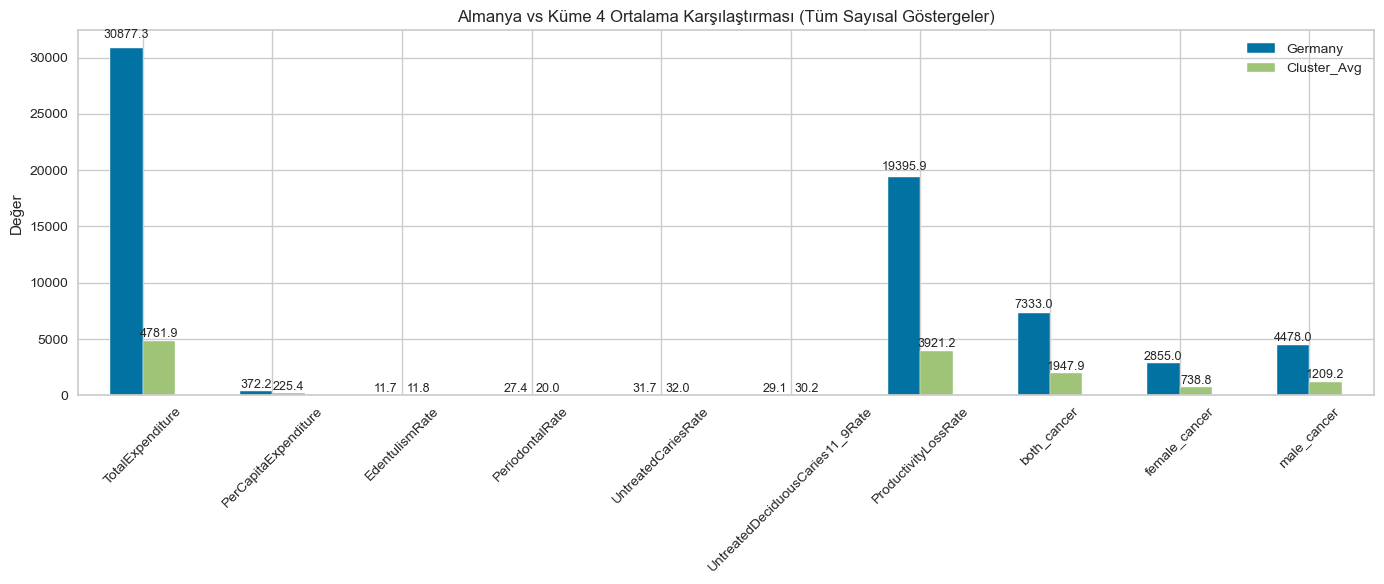

In [105]:
# T√ºm sayƒ±sal s√ºtunlar
numerical_cols = df.select_dtypes(include="number").columns.tolist()
numerical_cols.remove("kmeans_cluster_no")  # K√ºme etiketi kar≈üƒ±la≈ütƒ±rmaya dahil olmasƒ±n

# Almanya'nƒ±n deƒüerleri
germany_values = df[df["Location"] == "Germany"][numerical_cols]

# Almanya'nƒ±n k√ºme numarasƒ±
germany_cluster = df[df["Location"] == "Germany"]["kmeans_cluster_no"].values[0]

# K√ºme ortalamalarƒ±
cluster_mean = df[df["kmeans_cluster_no"] == germany_cluster][numerical_cols].mean()

# Kar≈üƒ±la≈ütƒ±rma tablosu ve yuvarlama
comparison = pd.DataFrame({
    "Germany": germany_values.values.flatten(),
    "Cluster_Avg": cluster_mean.values
}, index=numerical_cols).round(1)

print("\nKar≈üƒ±la≈ütƒ±rma:\n", comparison)

# G√∂rselle≈ütirme - Barplot
ax = comparison.plot(kind="bar", figsize=(14,6))

# Barlarƒ±n √ºst√ºne deƒüerleri yaz
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2., 
            y=height + 0.02*height,
            s=f'{height:.1f}',
            ha='center', va='bottom', fontsize=9)

plt.title(f"Almanya vs K√ºme {germany_cluster} Ortalama Kar≈üƒ±la≈ütƒ±rmasƒ± (T√ºm Sayƒ±sal G√∂stergeler)")
plt.ylabel("Deƒüer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

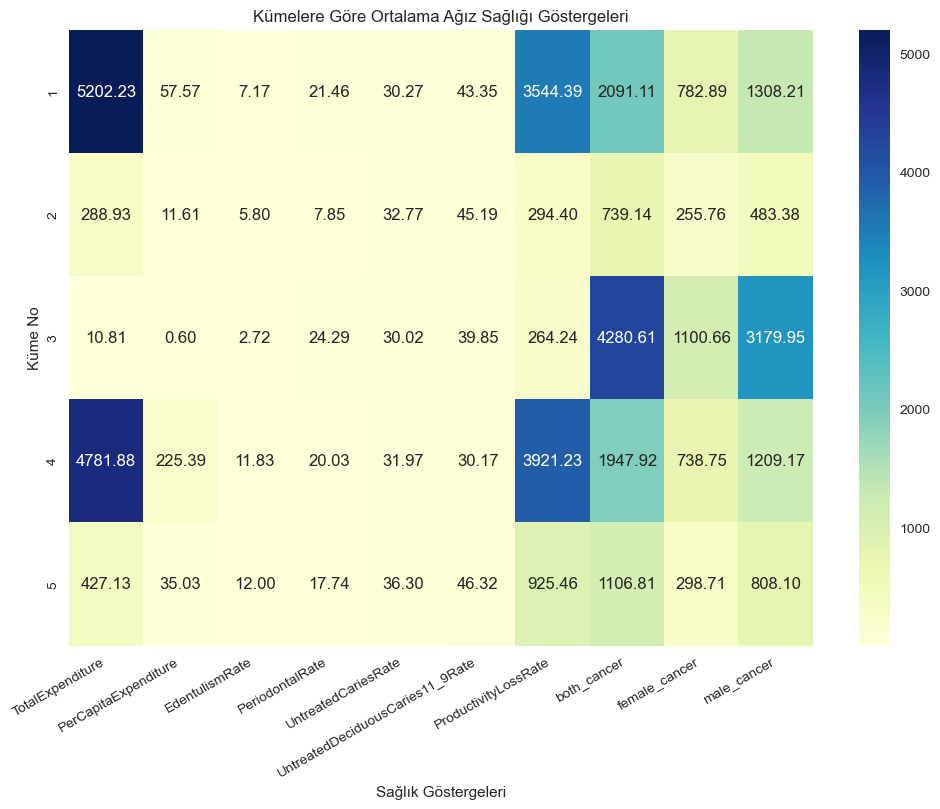

In [106]:
# Sadece sayƒ±sal s√ºtunlar
num_cols = df.select_dtypes(include='number').columns.drop('kmeans_cluster_no')

# K√ºme bazƒ±nda ortalamalar
cluster_means_health = df.groupby("kmeans_cluster_no")[num_cols].mean()

# Heatmap g√∂rselle≈ütirme
plt.figure(figsize=(12,8))
sns.heatmap(cluster_means_health, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("K√ºmelere G√∂re Ortalama Aƒüƒ±z Saƒülƒ±ƒüƒ± G√∂stergeleri")
plt.xticks(rotation=30, ha='right')  
plt.xlabel("Saƒülƒ±k G√∂stergeleri")
plt.ylabel("K√ºme No")
plt.show()

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

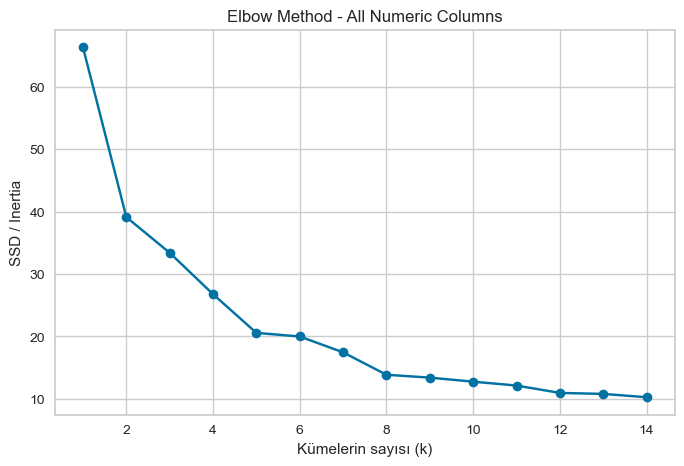

In [107]:
#Agiz kanseri dahil Kmeans k√ºmeleme (eksik deger satirlari silindi)

# T√ºm sayƒ±sal s√ºtunlarƒ± se√ß
numeric_cols = df.select_dtypes(include=np.number).columns

# NaN deƒüerleri temizle
df_numeric = df[numeric_cols].dropna()

# √ñl√ßekleme
scaler = MinMaxScaler()
Xall_scaled = scaler.fit_transform(df_numeric)

# Elbow Method i√ßin SSD hesaplama
ssd = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xall_scaled)
    ssd.append(kmeans.inertia_)

# G√∂rselle≈ütirme
plt.figure(figsize=(8,5))
plt.plot(K, ssd, 'bo-')
plt.xlabel('K√ºmelerin sayƒ±sƒ± (k)')
plt.ylabel('SSD / Inertia')
plt.title('Elbow Method - All Numeric Columns')
plt.show()

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

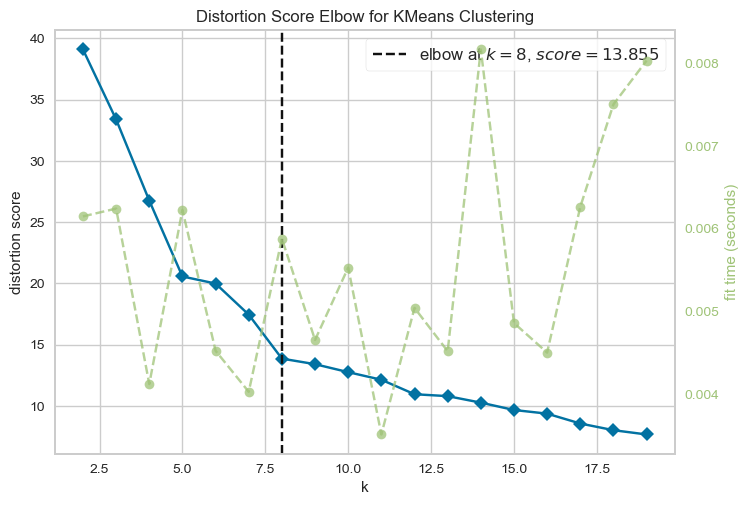

Optimal k√ºme sayƒ±sƒ±: 8


In [108]:
# √ñl√ßekleme
scaler = MinMaxScaler()
Xall_scaled = scaler.fit_transform(df_numeric)

# KMeans modeli
kmeans = KMeans(random_state=42)

# K-Elbow (2-20 arasƒ±nda K denemesi)
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(Xall_scaled)
elbow.show()

# Optimal K
print("Optimal k√ºme sayƒ±sƒ±:", elbow.elbow_value_)

In [109]:
# √ñl√ßekleme
scaler = MinMaxScaler()
Xall_scaled = scaler.fit_transform(df_numeric)

# KMeans fit
kmeans = KMeans(n_clusters=elbow.elbow_value_, random_state=42)
kmeans.fit(Xall_scaled)

# K√ºme sayƒ±sƒ±
print("K√ºme sayƒ±sƒ±:", kmeans.n_clusters)

# K√ºme merkezleri (√∂l√ßeklenmi≈ü deƒüerler)
print("K√ºme merkezleri:\n", kmeans.cluster_centers_)

# Her verinin etiketi (hangi segmentte olduƒüu)
df_numeric["kmeans_cluster_no"] = kmeans.labels_ + 1

# ƒ∞lk 5 satƒ±r
df_numeric.head()

K√ºme sayƒ±sƒ±: 8
K√ºme merkezleri:
 [[1.93069454e-02 1.00896002e-01 3.76992377e-01 6.03170478e-01
  3.09341951e-01 7.06071289e-01 2.66587528e-02 1.09196133e-02
  1.87567637e-02 8.58765320e-03 1.11022302e-16]
 [1.62761583e-02 1.78466319e-01 6.67652860e-01 5.13313609e-01
  3.96599777e-01 3.30434783e-01 3.12985874e-02 9.56225938e-03
  1.56857342e-02 7.74228638e-03 7.69230769e-01]
 [7.28994546e-05 1.19926199e-03 9.48717949e-02 7.02884615e-01
  2.95108696e-01 6.11086957e-01 1.20445845e-03 7.26419328e-03
  1.10808174e-02 6.13343207e-03 5.00000000e-01]
 [2.75992142e-03 2.26692830e-02 2.88019452e-01 2.10764810e-01
  3.76436782e-01 7.57921039e-01 4.76173275e-03 5.42304274e-03
  8.17956443e-03 4.60901309e-03 2.50000000e-01]
 [2.38497129e-03 4.57661682e-02 6.95512821e-01 4.94551282e-01
  5.23097826e-01 8.11666667e-01 1.12264359e-02 8.37122132e-03
  9.67522707e-03 7.99111408e-03 1.00000000e+00]
 [6.10802619e-02 6.18551773e-01 7.01183432e-01 6.07248521e-01
  3.55351171e-01 3.81716834e-01 7.5891087

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TotalExpenditure  PerCapitaExpenditure  EdentulismRate  PeriodontalRate  \
0              70.2                   2.3             4.0             23.9   
1               1.3                   0.1             2.0             19.2   
2               3.3                   0.3             2.9             27.1   
3               4.6                   0.2             1.9             27.4   
4              57.4                  24.1             7.5             26.3   

   UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
0                 27.2                              37.8   
1                 31.7                              41.6   
2                 29.5                              39.6   
3                 27.5                              40.3   
4                 32.7                              37.6   

   ProductivityLossRate  both_cancer  female_cancer  male_cancer  \
0                 195.8        482.0          166.0        316.0   
1                   5.3         92.0           30.0         62.0   
2                  30.0         74.0           42.0         32.0   
3                  30.8        179.0           55.0        124.0   
4                  59.2         60.0            8.0         52.0   

   kmeans_cluster_no  
0                  3  
1                  3  
2                  3  
3                  3  
4                  1

In [110]:
# Sayƒ±sal s√ºtunlar
numeric_cols = df_numeric.select_dtypes(include=np.number).columns.tolist()

# kmeans_cluster_no'yu √ßƒ±kar
if "kmeans_cluster_no" in numeric_cols:
    numeric_cols.remove("kmeans_cluster_no")

# K√ºme bazlƒ± √∂zet
cluster_summary = df_numeric.groupby("kmeans_cluster_no")[numeric_cols].agg(["count", "mean", "median"])

# Multi-index s√ºtunlarƒ± d√ºzle≈ütir
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

# Daha okunaklƒ± yapmak i√ßin sayƒ±larƒ± yuvarla
cluster_summary = cluster_summary.round(1)

# G√∂ster
cluster_summary



TotalExpenditure_count  TotalExpenditure_mean  \
kmeans_cluster_no                                                  
1                                      37                 2577.6   
2                                      13                 2173.0   
3                                      40                    9.7   
4                                      29                  368.5   
5                                      40                  318.4   
6                                      13                 8154.6   
7                                       1               133505.8   
8                                       1                   64.5   

                   TotalExpenditure_median  PerCapitaExpenditure_count  \
kmeans_cluster_no                                                        
1                                     82.3                          37   
2                                    593.7                          13   
3                                      2.9                          40   
4                                     16.7                          29   
5                                    117.2                          40   
6                                   3375.8                          13   
7                                 133505.8                           1   
8                                     64.5                           1   

                   PerCapitaExpenditure_mean  PerCapitaExpenditure_median  \
kmeans_cluster_no                                                           
1                                       52.0                         16.7   
2                                       91.9                         91.6   
3                                        0.6                          0.2   
4                                       11.7                          3.1   
5                                       23.6                         15.5   
6                                      318.5                        321.7   
7                                      405.5                        405.5   
8                                        0.0                          0.0   

                   EdentulismRate_count  EdentulismRate_mean  \
kmeans_cluster_no                                              
1                                    37                  7.1   
2                                    13                 11.6   
3                                    40                  2.7   
4                                    29                  5.7   
5                                    40                 12.0   
6                                    13                 12.1   
7                                     1                 10.2   
8                                     1                  4.0   

                   EdentulismRate_median  PeriodontalRate_count  ...  \
kmeans_cluster_no                                                ...   
1                                    7.5                     37  ...   
2                                   12.0                     13  ...   
3                                    2.7                     40  ...   
4                                    5.4                     29  ...   
5                                   12.1                     40  ...   
6                                   11.7                     13  ...   
7                                   10.2                      1  ...   
8                                    4.0                      1  ...   

                   ProductivityLossRate_median  both_cancer_count  \
kmeans_cluster_no                                                   
1                                        220.4                 37   
2                                       1132.8                 13   
3                                         26.0                 40   
4                                         49.8                 29   
5                                        291.4    

C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\3314243763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


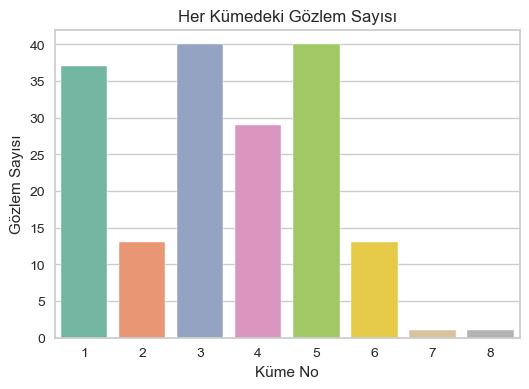

In [111]:
# Her k√ºmede g√∂zlem sayƒ±sƒ±
cluster_counts = cluster_summary['TotalExpenditure_count']

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Her K√ºmedeki G√∂zlem Sayƒ±sƒ±")
plt.xlabel("K√ºme No")
plt.ylabel("G√∂zlem Sayƒ±sƒ±")
plt.show()



In [112]:
# Eƒüer df_numeric sadece sayƒ±sallarƒ± i√ßeriyorsa
df_numeric["Location"] = df["Location"]
clusters_countries = df_numeric.groupby("kmeans_cluster_no")["Location"].apply(list)

for cluster, countries in clusters_countries.items():
    print(f"\nüìå K√ºme {cluster} ({len(countries)} √ºlke):")
    print(", ".join(countries))


üìå K√ºme 1 (37 √ºlke):
Botswana, CentralAfricanRepublic, Lesotho, Eswatini, SouthAfrica, Zimbabwe, Argentina, Bahamas, Barbados, Canada, CostaRica, DominicanRepublic, Guatemala, Guyana, Honduras, Haiti, Jamaica, SaintLucia, Mexico, Nicaragua, Panama, Paraguay, ElSalvador, Suriname, Venezuela(BolivarianRepublicof), UnitedArabEmirates, Bahrain, Egypt, Iran(IslamicRepublicof), Kuwait, Libya, Qatar, Indonesia, Thailand, China, RepublicofKorea, Singapore

üìå K√ºme 2 (13 √ºlke):
Namibia, Colombia, TrinidadandTobago, Cyprus, Finland, France, UnitedKingdomofGreatBritainandNorthernIreland, Greece, Ireland, Israel, Malta, Portugal, NewZealand

üìå K√ºme 3 (40 √ºlke):
Angola, Burundi, Benin, BurkinaFaso, Coted'Ivoire, Cameroon, DemocraticRepublicoftheCongo, Congo, Comoros, CaboVerde, Eritrea, Ethiopia, Gabon, Ghana, Guinea, Gambia, Guinea-Bissau, EquatorialGuinea, Kenya, Liberia, Madagascar, Mali, Mozambique, Mauritania, Malawi, Niger, Nigeria, Rwanda, Senegal, SouthSudan, Chad, Togo, Unite

üìåK√ºme 1 (37 √ºlke)

√áoƒüunluk Afrika ve bazƒ± Orta-Amerika √ºlkeleri.

Orta-d√º≈ü√ºk toplam harcama ve ki≈üi ba≈üƒ± harcama olasƒ±lƒ±ƒüƒ± y√ºksek.

Toplam harcama: 2577 ortalama

Ki≈üi ba≈üƒ± harcama: 51.95

√úretkenlik kaybƒ± ve aƒüƒ±z saƒülƒ±ƒüƒ± oranlarƒ±: orta seviyede

Kanser vakalarƒ±: d√º≈ü√ºk-orta

Bu k√ºme √ßoƒüunlukla orta gelirli √ºlkeler olabilir.

üìåK√ºme 2 (13 √ºlke)

Avrupa‚Äônƒ±n bazƒ± refah d√ºzeyi y√ºksek √ºlkeleri (ƒ∞svi√ßre, Finland, ƒ∞ngiltere vb.)

Y√ºksek aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri ve harcama ortalamasƒ± daha iyi olabilir.

Toplam harcama: 2172 ortalama

Ki≈üi ba≈üƒ± harcama: 91.9 (K√ºme 1‚Äôden y√ºksek)

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri y√ºksek

Kanser vakalarƒ± orta seviyede

Avrupa‚Äônƒ±n refah seviyesi orta-√ºst √ºlkeleri gibi g√∂r√ºn√ºyor.

üìåK√ºme 3 (40 √ºlke)

Afrika‚Äônƒ±n d√º≈ü√ºk gelirli √ºlkeleri aƒüƒ±rlƒ±klƒ±.

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergelerinde sorunlu, harcamada d√º≈ü√ºk.

Toplam harcama √ßok d√º≈ü√ºk: 9.7

Ki≈üi ba≈üƒ± harcama 0.6 ‚Üí ciddi d√º≈ü√ºk gelir

Aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri k√∂t√º deƒüil ama d√º≈ü√ºk harcama dikkat √ßekici

Kanser vakalarƒ± d√º≈ü√ºk ‚Üí demografik ve raporlama etkisi olabilir.

üìåK√ºme 4 (29 √ºlke)

Orta Doƒüu ve G√ºneydoƒüu Asya √ºlkeleri, geli≈ümekte olan √ºlkeler karƒ±≈üƒ±k.

Harcama ve saƒülƒ±k g√∂stergeleri karƒ±≈üƒ±k.

üìåK√ºme 5 (40 √ºlke)

G√ºney Amerika ve Doƒüu Avrupa aƒüƒ±rlƒ±klƒ±.

Harcama ve saƒülƒ±k g√∂stergelerinde orta seviyeler.

(k√ºme 4 ve k√ºme 5 Orta harcama ve ki≈üi ba≈üƒ± harcama Aƒüƒ±z saƒülƒ±ƒüƒ± ve kanser vakalarƒ± deƒüi≈üken

Muhtemelen geli≈ümekte olan √ºlkeler veya karƒ±≈üƒ±k gelir grubu)

üìåK√ºme 6 (13 √ºlke)

Almanya, ƒ∞sve√ß, Avusturya gibi zengin √ºlkeler + geli≈ümi≈ü √ºlkeler.

Y√ºksek toplam ve ki≈üi ba≈üƒ± harcama, iyi aƒüƒ±z saƒülƒ±ƒüƒ± g√∂stergeleri.

Toplam ve ki≈üi ba≈üƒ± harcama y√ºksek (8154 ve 318 ki≈üi ba≈üƒ±)

Kanser vakalarƒ± orta-y√ºksek

Refah seviyesi y√ºksek √ºlkeler

üìåK√ºme 7 (1 √ºlke)

ABD tek ba≈üƒ±na bir k√ºme olu≈üturmu≈ü.

Toplam ve ki≈üi ba≈üƒ± harcama √ßok y√ºksek

Kanser vakalarƒ± da √ßok y√ºksek

B√ºy√ºk toplam harcama ama ki≈üi ba≈üƒ±na deƒüi≈ükenlik g√∂sterebilir.

Tek ba≈üƒ±na k√ºme olu≈ümasƒ± n√ºfus ve harcama etkisinden kaynaklanƒ±yor.

üìåK√ºme 8 (1 √ºlke)

Hindistan tek ba≈üƒ±na.

√áok b√ºy√ºk n√ºfus ve d√º≈ü√ºk ki≈üi ba≈üƒ± harcama nedeniyle ayrƒ± k√ºme.

Toplam harcama d√º≈ü√ºk, ki≈üi ba≈üƒ± harcama √ßok d√º≈ü√ºk

Kanser vakalarƒ± n√ºfus etkisiyle √ßok y√ºksek

Bu da n√ºfus b√ºy√ºkl√ºƒü√º ve d√º≈ü√ºk ki≈üi ba≈üƒ± harcama etkisi.



üîπ Analiz Yorumlarƒ±

K√ºmeleme, gelir ve saƒülƒ±k g√∂stergeleri ile coƒürafi daƒüƒ±lƒ±mƒ± birle≈ütiriyor gibi.

K√ºme 6 Almanya dahil, y√ºksek harcama ve iyi saƒülƒ±k g√∂stergeleri ile zengin √ºlkeleri temsil ediyor.

K√ºme 1 ve 3, d√º≈ü√ºk gelir ve d√º≈ü√ºk saƒülƒ±k g√∂stergeleri olan √ºlkeleri temsil ediyor.

ABD ve Hindistan gibi n√ºfus etkisi √ßok y√ºksek √ºlkeler, tek ba≈ülarƒ±na ayrƒ± k√ºme olu≈üturmu≈ü.

üîπ Genel Yorumlar

Harcamalar ve saƒülƒ±k g√∂stergeleri k√ºmeleme i√ßin g√º√ßl√º etken.

N√ºfus etkisi (ABD, Hindistan) tekil k√ºmeler olu≈üturuyor.

Avrupa ve y√ºksek gelirli √ºlkeler kendi k√º√ß√ºk k√ºmelerinde toplanmƒ±≈ü (k√ºme 6).

D√º≈ü√ºk gelirli Afrika ve bazƒ± Asya √ºlkeleri k√ºme 3‚Äôte toplanmƒ±≈ü.

In [113]:
countries = ['SaoTomeandPrincipe', 'Seychelles', 'AntiguaandBarbuda', 'Belize', 
             'Dominica', 'Grenada', 'SaintKittsandNevis', 'SaintVincentandtheGrenadines',
             'Andorra', 'Monaco', 'SanMarino', 'Micronesia(FederatedStatesof)', 
             'Kiribati', 'MarshallIslands', 'Nauru', 'Palau', 'Tonga', 'Tuvalu']

# K√ºme numaralarƒ±nƒ± al
cluster_info = df[df['Location'].isin(countries)][['Location', 'kmeans_cluster_no']]

print(cluster_info)


                          Location  kmeans_cluster_no
37              SaoTomeandPrincipe                  3
39                      Seychelles                  2
48               AntiguaandBarbuda                  1
50                          Belize                  1
59                        Dominica                  1
62                         Grenada                  1
68              SaintKittsandNevis                  1
80    SaintVincentandtheGrenadines                  1
104                        Andorra                  4
135                         Monaco                  4
146                      SanMarino                  4
171  Micronesia(FederatedStatesof)                  2
174                       Kiribati                  2
177                MarshallIslands                  2
180                          Nauru                  2
183                          Palau                  2
187                          Tonga                  2
188                         


Kar≈üƒ±la≈ütƒ±rma:
                                   Germany  Cluster_Avg
TotalExpenditure                  30877.3       8154.6
PerCapitaExpenditure                372.2        318.5
EdentulismRate                       11.7         12.1
PeriodontalRate                      27.4         21.2
UntreatedCariesRate                  31.7         31.7
UntreatedDeciduousCaries11_9Rate     29.1         31.9
ProductivityLossRate              19395.9       5956.6
both_cancer                        7333.0       2362.9
female_cancer                      2855.0        907.6
male_cancer                        4478.0       1455.3


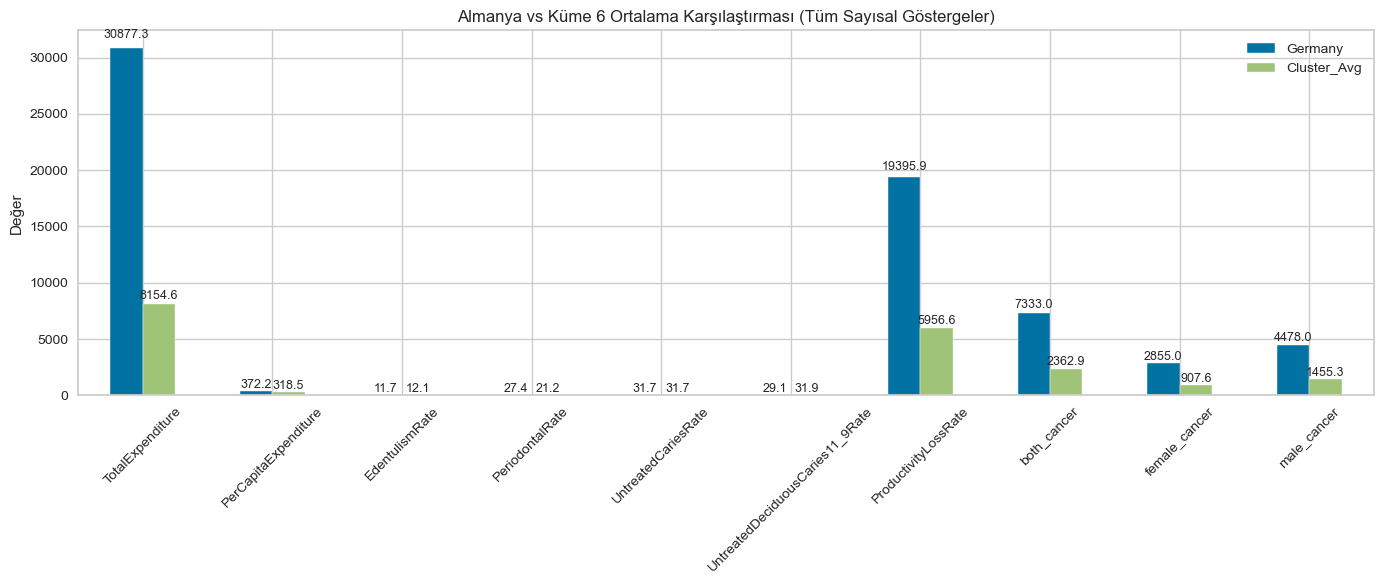

In [114]:

# T√ºm sayƒ±sal s√ºtunlar
numerical_cols = df_numeric.select_dtypes(include="number").columns.tolist()
numerical_cols.remove("kmeans_cluster_no")  # K√ºme etiketi kar≈üƒ±la≈ütƒ±rmaya dahil olmasƒ±n

# Almanya'nƒ±n deƒüerleri
germany_values = df_numeric[df_numeric["Location"] == "Germany"][numerical_cols]

# Almanya'nƒ±n k√ºme numarasƒ±
germany_cluster = df_numeric[df_numeric["Location"] == "Germany"]["kmeans_cluster_no"].values[0]

# K√ºme ortalamalarƒ±
cluster_mean = df_numeric[df_numeric["kmeans_cluster_no"] == germany_cluster][numerical_cols].mean()

# Kar≈üƒ±la≈ütƒ±rma tablosu ve 1 ondalƒ±k basamak
comparison = pd.DataFrame({
    "Germany": germany_values.values.flatten(),
    "Cluster_Avg": cluster_mean.values
}, index=numerical_cols).round(1)

print("\nKar≈üƒ±la≈ütƒ±rma:\n", comparison)

# G√∂rselle≈ütirme - Barplot
ax = comparison.plot(kind="bar", figsize=(14,6))

# Barlarƒ±n √ºst√ºne y deƒüerlerini yaz
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2., 
            y=height + 0.02*height,  # bar √ºst√ºnde bo≈üluk
            s=f'{height:.1f}',       # 1 ondalƒ±k basamak
            ha='center', va='bottom', fontsize=9)

plt.title(f"Almanya vs K√ºme {germany_cluster} Ortalama Kar≈üƒ±la≈ütƒ±rmasƒ± (T√ºm Sayƒ±sal G√∂stergeler)")
plt.ylabel("Deƒüer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

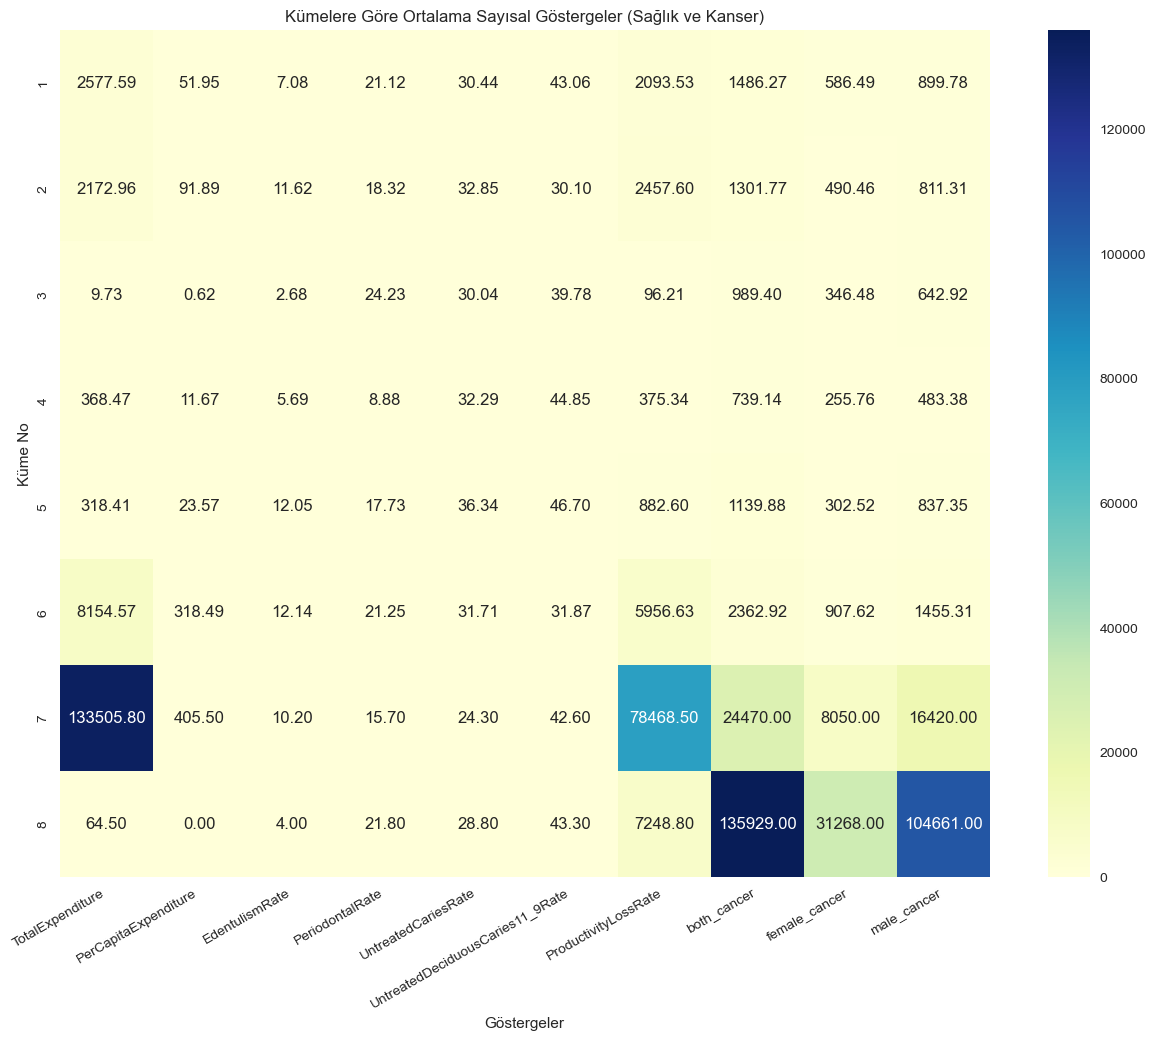

In [115]:
# Sadece sayƒ±sal s√ºtunlar
numeric_cols = df_numeric.select_dtypes(include='number').columns.drop('kmeans_cluster_no')

# K√ºme bazƒ±nda ortalamalar
cluster_means = df_numeric.groupby("kmeans_cluster_no")[numeric_cols].mean()

# Heatmap g√∂rselle≈ütirme
plt.figure(figsize=(15,11))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("K√ºmelere G√∂re Ortalama Sayƒ±sal G√∂stergeler (Saƒülƒ±k ve Kanser)")
plt.xlabel("G√∂stergeler")
plt.ylabel("K√ºme No")
plt.xticks(rotation=30, ha='right')  
plt.show()

C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\2330077310.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["both_cancer_fill"] = df.groupby(


Cophenetic Correlation: 0.602
n_clusters=2, Silhouette Score=0.806
n_clusters=3, Silhouette Score=0.773
n_clusters=4, Silhouette Score=0.384
n_clusters=5, Silhouette Score=0.270
n_clusters=6, Silhouette Score=0.286
n_clusters=7, Silhouette Score=0.280
n_clusters=8, Silhouette Score=0.277
n_clusters=9, Silhouette Score=0.215
‚úÖ Optimal k√ºme sayƒ±sƒ±: 2, Silhouette Score: 0.806


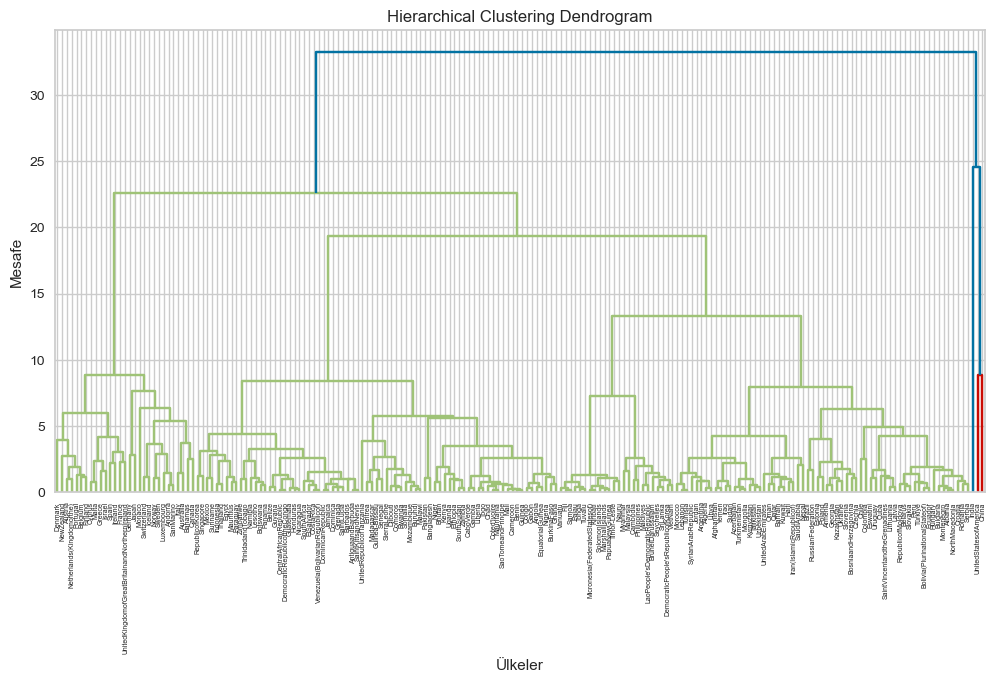

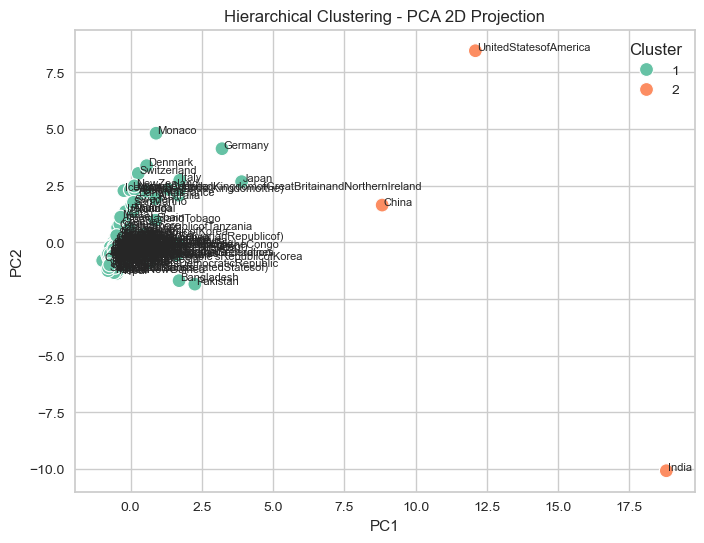


üìä K√ºme √ñzet Tablosu (Ortalamalar):
          TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
hcluster                                                           
1              1015.733333             53.412698        7.660847   
2             65039.633333            149.833333        6.633333   

          PeriodontalRate  UntreatedCariesRate  \
hcluster                                         
1               18.441270            32.357143   
2               18.333333            25.900000   

          UntreatedDeciduousCaries11_9Rate  ProductivityLossRate  \
hcluster                                                           
1                                41.692063           1011.938624   
2                                44.366667          43810.133333   

          both_cancer_fill  female_cancer   male_cancer  
hcluster                                                 
1               964.635498     360.707602    686.789474  
2             63505.333333   16963.000

In [116]:

#Hierarchical Clustering (Hiyerar≈üik K√ºmeleme)

#Ama√ß: Veri setindeki √ºlkeleri veya g√∂zlemleri benzerliklerine g√∂re gruplamak.

#Hiyerar≈üik y√∂ntem, g√∂zlemler arasƒ±ndaki mesafeyi kullanarak aƒüa√ß yapƒ±sƒ± (dendrogram) olu≈üturur.

#Bu sayede hangi g√∂zlemlerin birbirine yakƒ±n olduƒüu ve hangi g√∂zlemlerden daha farklƒ± olduƒüu anla≈üƒ±lƒ±r.

#G√∂rselle≈ütirme: PCA ile 2D Projeksiyon

#Ama√ß: Y√ºksek boyutlu veriyi 2 boyuta indirerek k√ºmeleri g√∂rselle≈ütirmek.

#Renkler = k√ºmeler ‚Üí her k√ºme farklƒ± renkle g√∂sterilir, b√∂ylece hangi g√∂zlemlerin aynƒ± k√ºmeye ait olduƒüu kolayca g√∂r√ºl√ºr.



def hierarchical_clustering_pipeline(df, features, cluster_range=range(2,10)):
    # Eksik deƒüerleri doldurma: both_cancer_fill
    if 'both_cancer_fill' not in df.columns:
        if 'kmeans_cluster_no' in df.columns:
            df["both_cancer_fill"] = df.groupby(
                ["ExpenditureGroup", "kmeans_cluster_no"]
            )["both_cancer"].transform(lambda x: x.fillna(x.mean()))
        else:
            df["both_cancer_fill"] = df.groupby(
                ["ExpenditureGroup"]
            )["both_cancer"].transform(lambda x: x.fillna(x.mean()))
    
    # 1Ô∏è‚É£ Veri √∂l√ßeklendirme
    X = df[features].fillna(df[features].mean())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 2Ô∏è‚É£ Hiyerar≈üik k√ºmeleme
    Z = linkage(X_scaled, method='ward')
    
    # 3Ô∏è‚É£ Cophenetic correlation
    c, _ = cophenet(Z, pdist(X_scaled))
    print(f"Cophenetic Correlation: {c:.3f}")

    # 4Ô∏è‚É£ Optimal k√ºme sayƒ±sƒ± (Silhouette Score)
    best_score = -1
    best_k = 2
    for k in cluster_range:
        clusters = fcluster(Z, t=k, criterion='maxclust')
        score = silhouette_score(X_scaled, clusters)
        print(f"n_clusters={k}, Silhouette Score={score:.3f}")
        if score > best_score:
            best_score = score
            best_k = k
    print(f"‚úÖ Optimal k√ºme sayƒ±sƒ±: {best_k}, Silhouette Score: {best_score:.3f}")
    
    # 5Ô∏è‚É£ K√ºme atamasƒ±
    df['hcluster'] = fcluster(Z, t=best_k, criterion='maxclust')

    # 6Ô∏è‚É£ Dendrogram
    plt.figure(figsize=(12,6))
    dendrogram(Z, labels=df["Location"].values, color_threshold=None)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("√úlkeler")
    plt.ylabel("Mesafe")
    plt.xticks(rotation=90)
    plt.show()

    # 7Ô∏è‚É£ PCA ile 2D projeksiyon
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=X_pca[:,0], y=X_pca[:,1], 
        hue=df['hcluster'], 
        palette='Set2', s=100
    )

    for i, txt in enumerate(df["Location"]):
        plt.text(X_pca[i,0]+0.05, X_pca[i,1], txt, fontsize=8)

    plt.title("Hierarchical Clustering - PCA 2D Projection")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster")
    plt.show()
    
    # 8Ô∏è‚É£ K√ºme √∂zet tablosu
    cluster_summary = df.groupby("hcluster")[features].mean()
    print("\nüìä K√ºme √ñzet Tablosu (Ortalamalar):")
    print(cluster_summary)

    return df, best_k, best_score

# Jupyter i√ßin
%matplotlib inline
import matplotlib.pyplot as plt

# √ñzellik listesi
features = [
    'TotalExpenditure', 'PerCapitaExpenditure',
    'EdentulismRate', 'PeriodontalRate', 'UntreatedCariesRate',
    'UntreatedDeciduousCaries11_9Rate', 'ProductivityLossRate',
    'both_cancer_fill', 'female_cancer', 'male_cancer'
]

# Fonksiyonu √ßaƒüƒ±r
df, optimal_k, silhouette = hierarchical_clustering_pipeline(df, features)


##### Regression Model

In [117]:
df.isnull().sum()

Location                             0
TotalExpenditure                     0
PerCapitaExpenditure                 0
EdentulismRate                       0
PeriodontalRate                      0
UntreatedCariesRate                  0
UntreatedDeciduousCaries11_9Rate     0
ProductivityLossRate                 0
both_cancer                         18
female_cancer                       18
male_cancer                         18
ExpenditureGroup                     0
kmeans_cluster_no                    0
both_cancer_fill                     0
hcluster                             0
dtype: int64

In [118]:
df.columns

Index(['Location', 'TotalExpenditure', 'PerCapitaExpenditure',
       'EdentulismRate', 'PeriodontalRate', 'UntreatedCariesRate',
       'UntreatedDeciduousCaries11_9Rate', 'ProductivityLossRate',
       'both_cancer', 'female_cancer', 'male_cancer', 'ExpenditureGroup',
       'kmeans_cluster_no', 'both_cancer_fill', 'hcluster'],
      dtype='object')

In [ ]:
#REGRESYON MODELLERƒ∞

# Bo≈ü liste: sonu√ßlar burada tutulacak
results = []

# Hedef ve √∂zellikler
df["both_cancer_fill"] = df.groupby(["ExpenditureGroup", "kmeans_cluster_no"])["both_cancer"].transform(
    lambda x: x.fillna(x.mean())
)

target = 'ProductivityLossRate'  
features = ['TotalExpenditure', 'PerCapitaExpenditure', 'EdentulismRate', 
            'PeriodontalRate', 'UntreatedCariesRate', 'both_cancer_fill']

X = df[features]
y = df[target]

# Eƒüitim / test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller
regressors = [
    ("LinearRegression", LinearRegression()),
    ("KNN", KNeighborsRegressor()),
    ("CART", DecisionTreeRegressor()),
    ("RandomForest", RandomForestRegressor(random_state=42)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42, eval_metric='rmse'))
]

# Modelleri eƒüit ve metrikleri hesapla
for name, model in regressors:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "R2": round(r2_score(y_test, y_pred), 4),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
        "MAE": round(mean_absolute_error(y_test, y_pred), 4)
    })

# Sonu√ßlarƒ± DataFrame olarak g√∂ster
results_df = pd.DataFrame(results)
print(results_df)

              Model      R2       RMSE       MAE
0  LinearRegression  0.8788  1156.2920  555.6518
1               KNN  0.7560  1640.7891  616.1831
2              CART  0.7738  1579.7064  661.8333
3      RandomForest  0.8791  1154.9169  439.8851
4  GradientBoosting  0.9010  1045.1138  434.9410
5           XGBoost  0.8945  1078.8830  401.1981


C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\2449112737.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\2449112737.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\2449112737.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")


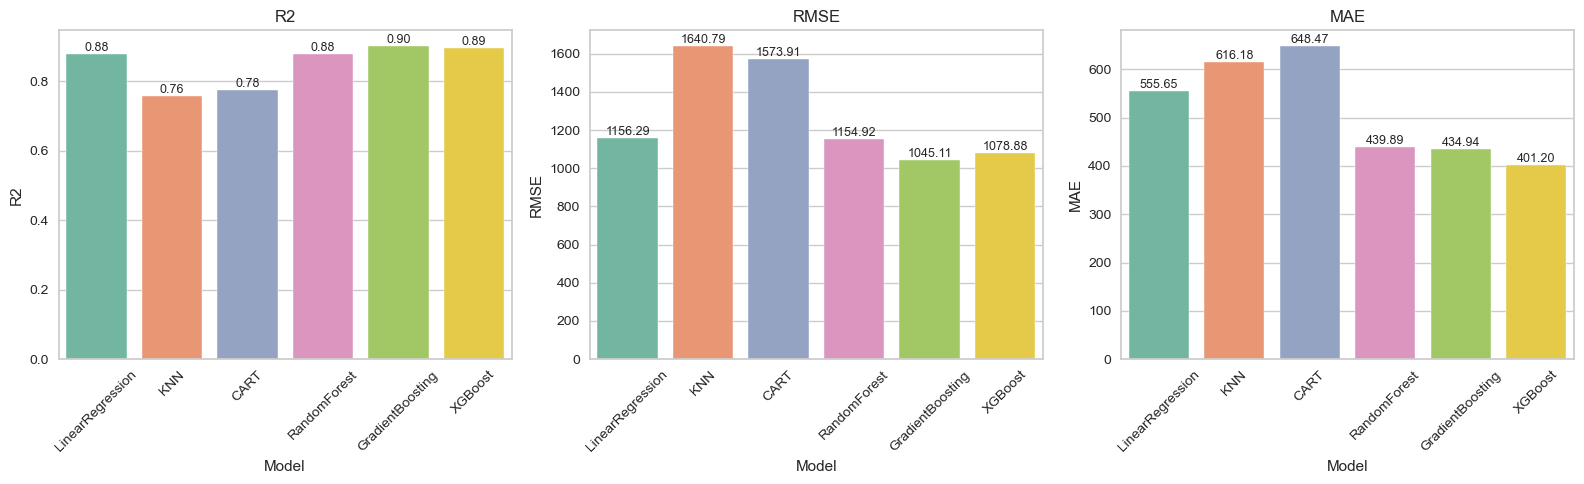

In [120]:

# √ñnceki kodla sonu√ßlar df i√ßinde hazƒ±r
# results_df = pd.DataFrame(results)

# R¬≤, RMSE ve MAE i√ßin ayrƒ± barplotlar
metrics = ["R2", "RMSE", "MAE"]

plt.figure(figsize=(16, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
    
    # Barlarƒ±n √ºst√ºne deƒüerleri yaz
    for p in plt.gca().patches:
        plt.gca().annotate(f"{p.get_height():.2f}", 
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=9)
    
    plt.title(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\User Laptop\AppData\Local\Temp\ipykernel_13504\4137107612.py:23: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


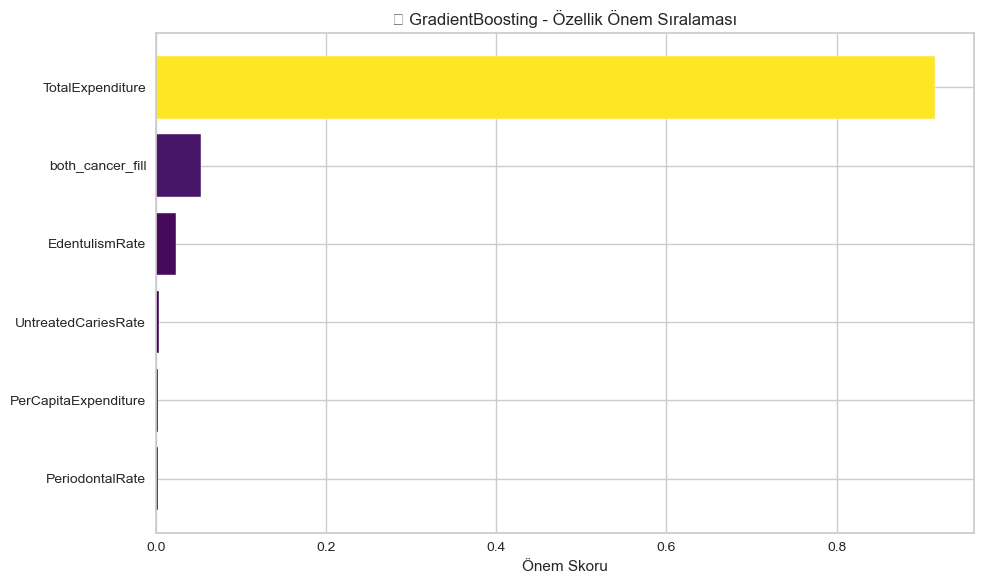

Feature Importances: [0.91562051 0.00242307 0.02391441 0.0021368  0.00309657 0.05280864]


In [121]:
# üîπ Modeli olu≈ütur ve eƒüit
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)  # X_train ve y_train daha √∂nce tanƒ±mlƒ± olmalƒ±

# üîπ Feature importance
importances = gb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# üîπ G√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
colors = cm.viridis(importance_df['Importance'] / importance_df['Importance'].max())
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel("√ñnem Skoru")
plt.title("üìå GradientBoosting - √ñzellik √ñnem Sƒ±ralamasƒ±")
plt.tight_layout()
plt.show()

# üîπ ƒ∞steƒüe baƒülƒ±: best_models s√∂zl√ºƒü√ºne ekle
best_models = {}
best_models['GradientBoosting'] = gb_model

print("Feature Importances:", importances)



SINIFLANDIRMA MODELLERƒ∞

In [ ]:
#####cv ekle
#√úlkelerin saƒülƒ±k ve harcama g√∂stergelerine bakarak, onlarƒ± harcama gruplarƒ±na (Low / Medium / High) sƒ±nƒ±flandƒ±rmak.

df["both_cancer_fill"] = df.groupby(
    ["ExpenditureGroup", "kmeans_cluster_no"]
)["both_cancer"].transform(lambda x: x.fillna(x.mean()))


# √ñzellikler ve hedef
features = ['TotalExpenditure',
            'EdentulismRate', 'PeriodontalRate', 'UntreatedCariesRate',
            'UntreatedDeciduousCaries11_9Rate', 'ProductivityLossRate',
            'both_cancer_fill']
target = 'ExpenditureGroup'

X = df[features].fillna(df[features].mean())
y = LabelEncoder().fit_transform(df[target])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# √ñzellik √∂l√ßeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model √∂rneƒüi
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17  0  2]
 [ 0 19  0]
 [ 0  1 19]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.95      1.00      0.97        19
           2       0.90      0.95      0.93        20

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



Satƒ±rlar ger√ßek sƒ±nƒ±flarƒ±, s√ºtunlar tahmin edilen sƒ±nƒ±flarƒ± g√∂sterir.


1. satƒ±r (ger√ßek sƒ±nƒ±f 0) ‚Üí 19 √∂rneƒüin 18‚Äôi doƒüru tahmin edilmi≈ü, 1‚Äôi yanlƒ±≈ülƒ±kla sƒ±nƒ±f 2‚Äôye gitmi≈ü.

2. satƒ±r (ger√ßek sƒ±nƒ±f 1) ‚Üí 19 √∂rneƒüin hepsi doƒüru tahmin edilmi≈ü.

3. satƒ±r (ger√ßek sƒ±nƒ±f 2) ‚Üí 20 √∂rneƒüin 19‚Äôu doƒüru, 1‚Äôi yanlƒ±≈ülƒ±kla sƒ±nƒ±f 1‚Äôe gitmi≈ü.

üìå Demek ki model sadece 2 √∂rneƒüi yanlƒ±≈ü sƒ±nƒ±flandƒ±rmƒ±≈ü.

üìà Classification Report
Precision (Kesinlik)

0 i√ßin: 1.00 ‚Üí Model "sƒ±nƒ±f 0" dediƒüinde %100 doƒüru.

1 i√ßin: 0.95 ‚Üí Model "sƒ±nƒ±f 1" dediƒüinde %95 doƒüru.

2 i√ßin: 0.95 ‚Üí Model "sƒ±nƒ±f 2" dediƒüinde %95 doƒüru.

Ortalama: ~0.97 ‚Üí Olduk√ßa y√ºksek.

Recall (Duyarlƒ±lƒ±k)

0 i√ßin: 0.95 ‚Üí Ger√ßekten sƒ±nƒ±f 0 olanlarƒ±n %95‚Äôi doƒüru bulunmu≈ü.

1 i√ßin: 1.00 ‚Üí T√ºm sƒ±nƒ±f 1‚Äôler doƒüru yakalanmƒ±≈ü.

2 i√ßin: 0.95 ‚Üí Sƒ±nƒ±f 2‚Äônin %95‚Äôi doƒüru bulunmu≈ü.

Ortalama: ~0.97

F1-Score (Precision & Recall‚Äôun dengesi)

0: 0.97

1: 0.97

2: 0.95

Genel: 0.97

Accuracy (Genel Doƒüruluk)

%97 ‚Üí 58 √∂rneƒüin sadece 2 tanesi yanlƒ±≈ü sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü.

üéØ Sonu√ß

Model √ßok y√ºksek doƒürulukla (97%) sƒ±nƒ±flandƒ±rma yapƒ±yor.

Hem precision hem recall deƒüerleri 0.95+ ‚Üí sƒ±nƒ±flar arasƒ±nda dengesizlik yok, yani model her sƒ±nƒ±fta tutarlƒ± √ßalƒ±≈üƒ±yor.

Yanlƒ±≈ülar √ßok az ‚Üí sadece sƒ±nƒ±f 0 ‚Üî 2 ve sƒ±nƒ±f 2 ‚Üî 1 arasƒ±nda k√º√ß√ºk karƒ±≈üƒ±klƒ±k var.

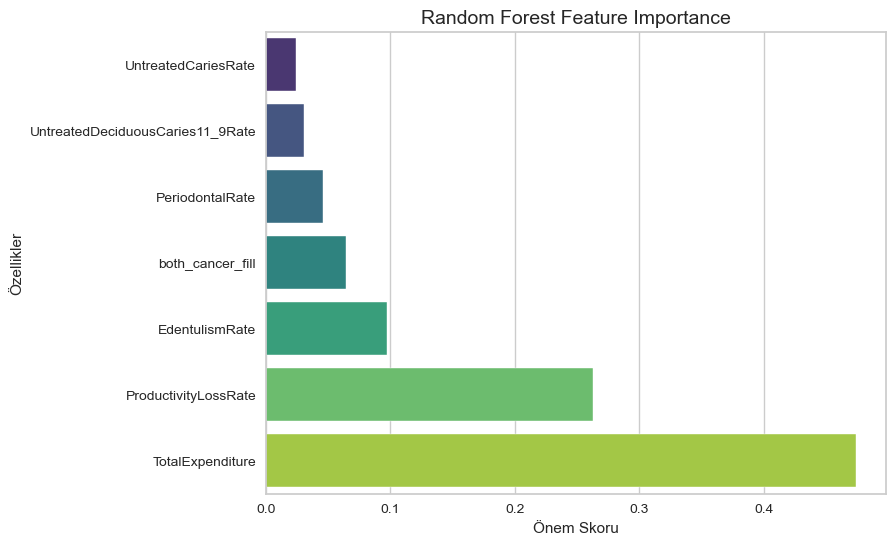

In [139]:

# √ñzellik √∂nemlerini √ßƒ±kar
feat_importances = pd.Series(rf.feature_importances_, index=features)

# K√º√ß√ºkten b√ºy√ºƒüe sƒ±rala
feat_importances = feat_importances.sort_values(ascending=True)

# G√∂rselle≈ütir
plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette="viridis")
plt.title("Random Forest Feature Importance", fontsize=14)
plt.xlabel("√ñnem Skoru")
plt.ylabel("√ñzellikler")
plt.show()


üîç FEATURE IMPORTANCE ANALƒ∞Z RAPORU

üéØ HEDEF DEƒûƒ∞≈ûKEN: √áocuklarda √á√ºr√ºk


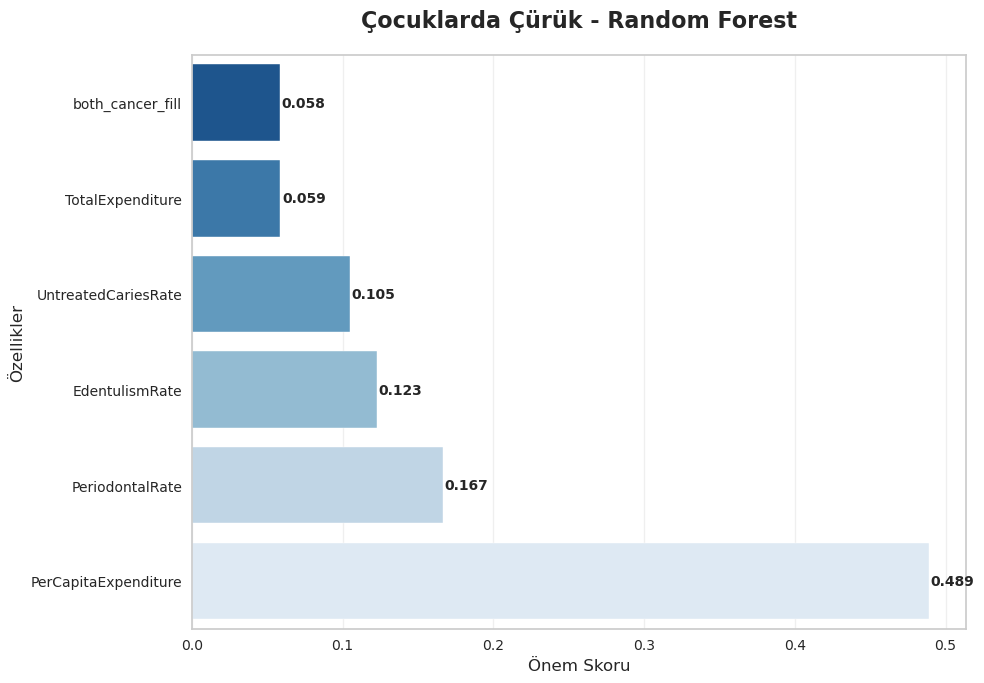


üìä √áocuklarda √á√ºr√ºk - Random Forest - En √ñnemli 3 √ñzellik:
1. PerCapitaExpenditure: 0.4888
2. PeriodontalRate: 0.1667
3. EdentulismRate: 0.1228
--------------------------------------------------


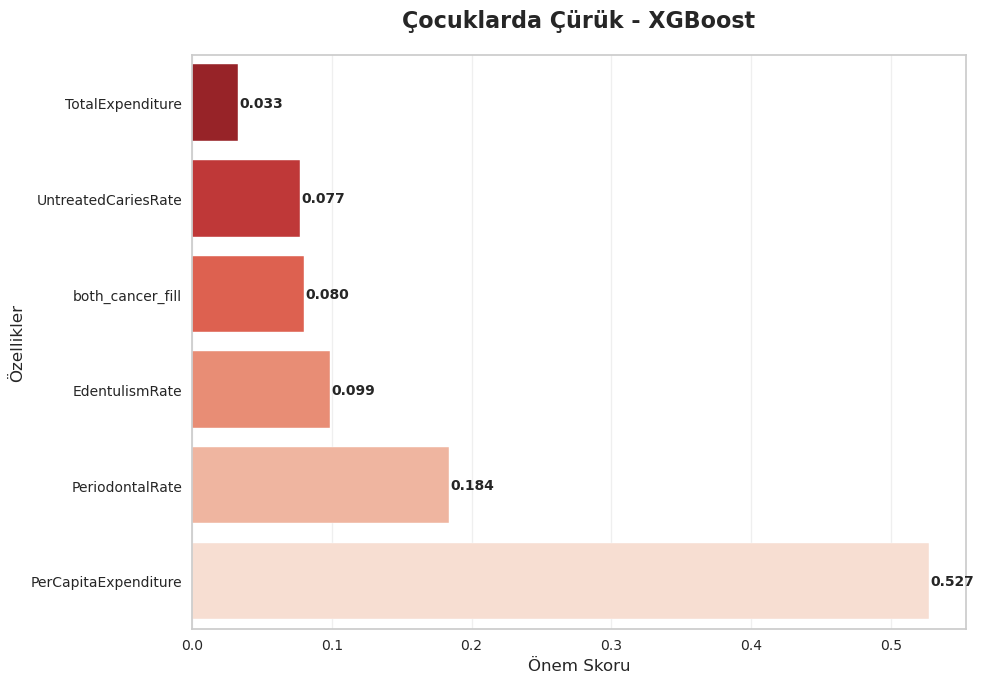


üìä √áocuklarda √á√ºr√ºk - XGBoost - En √ñnemli 3 √ñzellik:
1. PerCapitaExpenditure: 0.5272
2. PeriodontalRate: 0.1842
3. EdentulismRate: 0.0987
--------------------------------------------------

üìà √áocuklarda √á√ºr√ºk - Model Kar≈üƒ±la≈ütƒ±rmasƒ±:
                      Random Forest  XGBoost
PerCapitaExpenditure         0.4888   0.5272
PeriodontalRate              0.1667   0.1842
EdentulismRate               0.1228   0.0987
UntreatedCariesRate          0.1048   0.0772
TotalExpenditure             0.0587   0.0327
both_cancer_fill             0.0581   0.0800

üéØ HEDEF DEƒûƒ∞≈ûKEN: Productivity Loss


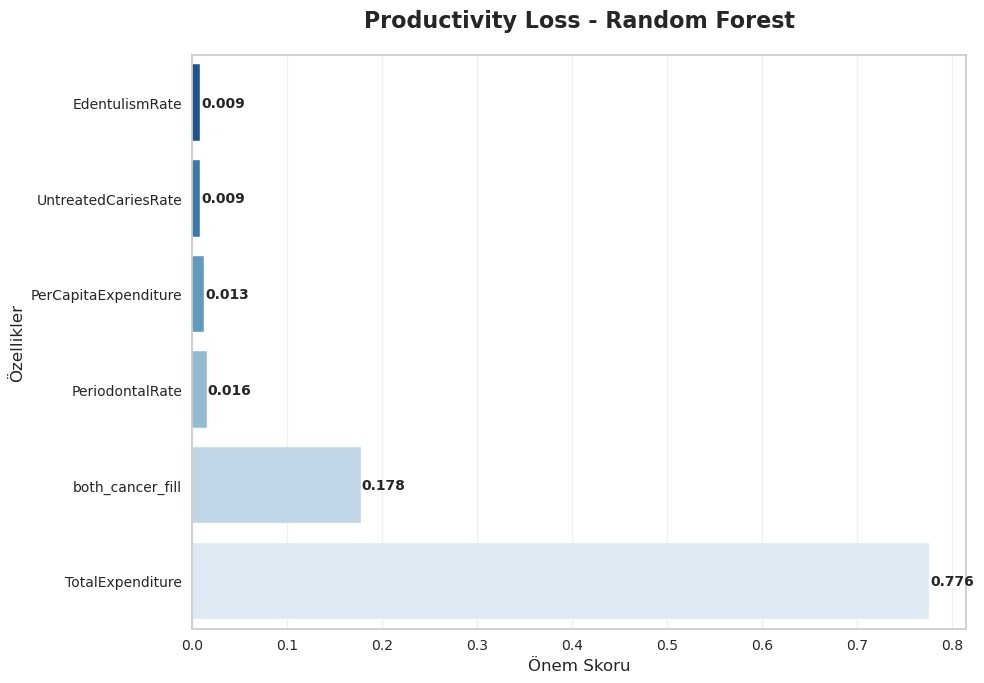


üìä Productivity Loss - Random Forest - En √ñnemli 3 √ñzellik:
1. TotalExpenditure: 0.7762
2. both_cancer_fill: 0.1778
3. PeriodontalRate: 0.0156
--------------------------------------------------


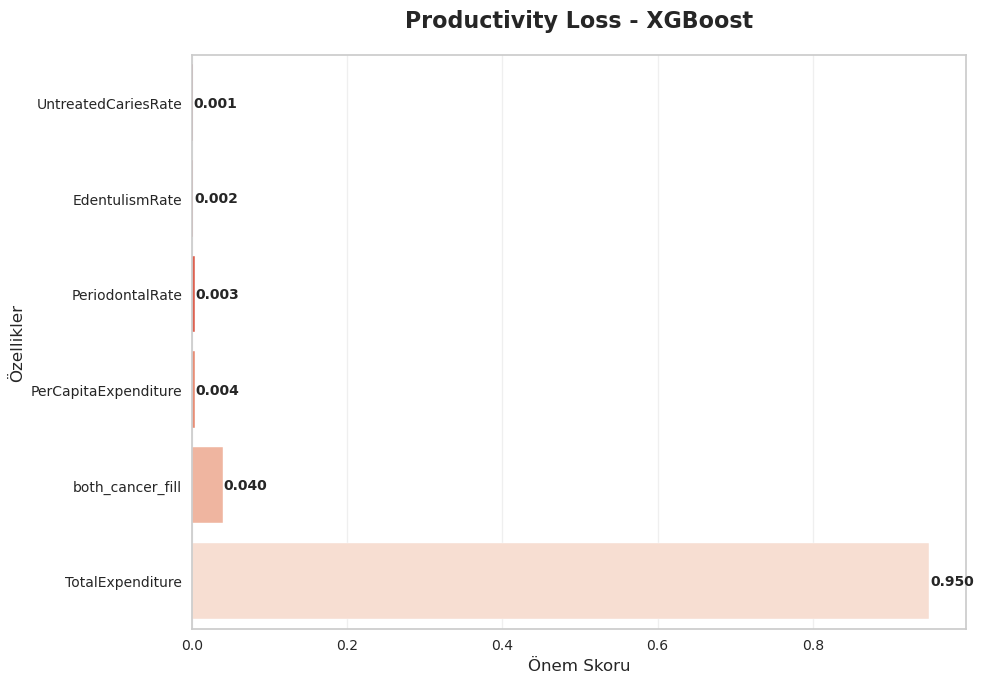


üìä Productivity Loss - XGBoost - En √ñnemli 3 √ñzellik:
1. TotalExpenditure: 0.9504
2. both_cancer_fill: 0.0397
3. PerCapitaExpenditure: 0.0037
--------------------------------------------------

üìà Productivity Loss - Model Kar≈üƒ±la≈ütƒ±rmasƒ±:
                      Random Forest  XGBoost
TotalExpenditure             0.7762   0.9504
both_cancer_fill             0.1778   0.0397
PeriodontalRate              0.0156   0.0035
PerCapitaExpenditure         0.0128   0.0037
UntreatedCariesRate          0.0089   0.0010
EdentulismRate               0.0087   0.0017

üéØ HEDEF DEƒûƒ∞≈ûKEN: Kanser Vakalarƒ±


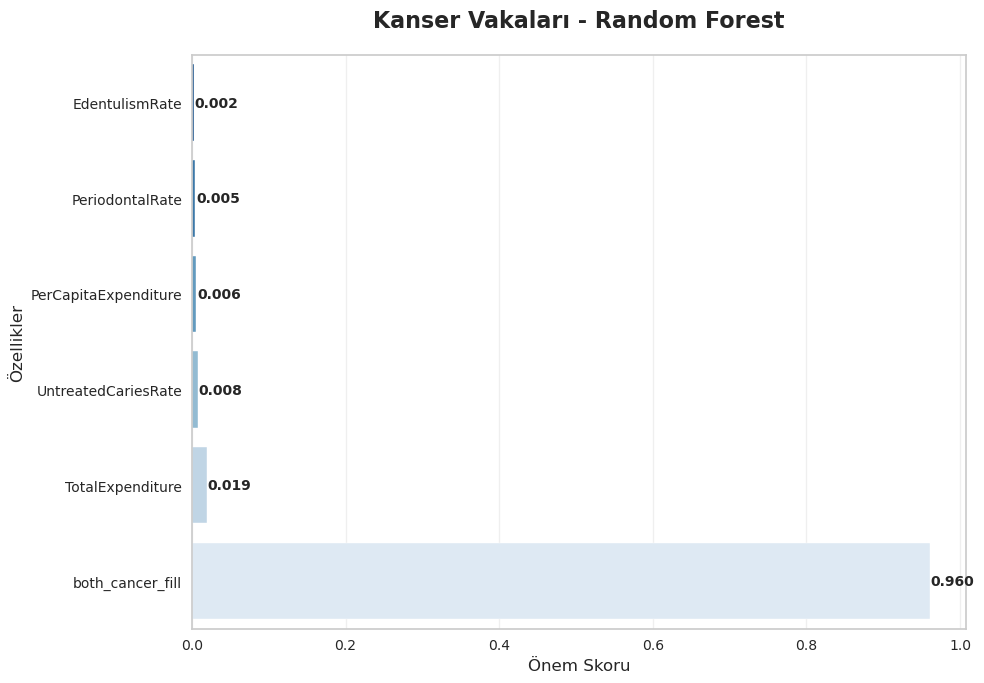


üìä Kanser Vakalarƒ± - Random Forest - En √ñnemli 3 √ñzellik:
1. both_cancer_fill: 0.9603
2. TotalExpenditure: 0.0192
3. UntreatedCariesRate: 0.0080
--------------------------------------------------


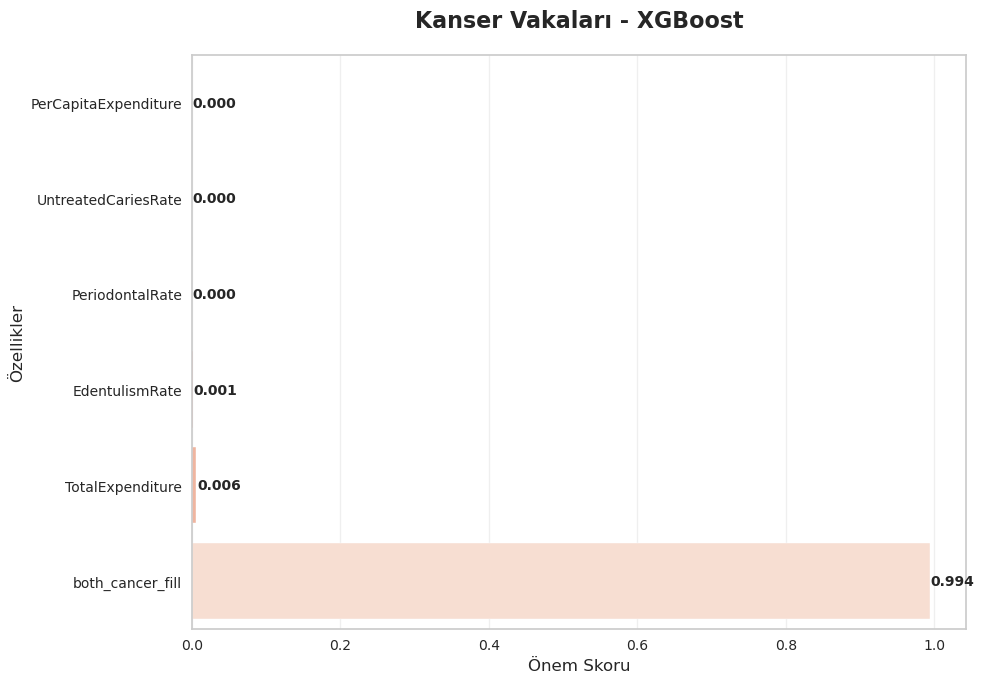


üìä Kanser Vakalarƒ± - XGBoost - En √ñnemli 3 √ñzellik:
1. both_cancer_fill: 0.9935
2. TotalExpenditure: 0.0057
3. EdentulismRate: 0.0008
--------------------------------------------------

üìà Kanser Vakalarƒ± - Model Kar≈üƒ±la≈ütƒ±rmasƒ±:
                      Random Forest  XGBoost
both_cancer_fill             0.9603   0.9935
TotalExpenditure             0.0192   0.0057
UntreatedCariesRate          0.0080   0.0000
PerCapitaExpenditure         0.0056   0.0000
PeriodontalRate              0.0046   0.0000
EdentulismRate               0.0023   0.0008

üìã √ñZET RAPOR - T√úM HEDEF DEƒûƒ∞≈ûKENLER

üèÜ T√ºm Modeller ƒ∞√ßin Feature Importance √ñzeti:
                      √áocuk √á√ºr√ºk (RF)  √áocuk √á√ºr√ºk (XGB)  Prod Loss (RF)  \
PerCapitaExpenditure            0.4888             0.5272          0.0128   
PeriodontalRate                 0.1667             0.1842          0.0156   
EdentulismRate                  0.1228             0.0987          0.0087   
UntreatedCariesRate      

In [143]:
# Feature Importance Analizi - √áoklu Model ve Hedef Deƒüi≈üken Kar≈üƒ±la≈ütƒ±rmasƒ±

# T√ºrk√ße karakter desteƒüi i√ßin
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. Ortak √∂zellikler (baƒüƒ±msƒ±z deƒüi≈ükenler)
features = [
    'TotalExpenditure', 'PerCapitaExpenditure',
    'EdentulismRate', 'PeriodontalRate', 
    'UntreatedCariesRate',
    'both_cancer_fill'
]

# Fonksiyon: Geli≈ümi≈ü Feature Importance G√∂rselle≈ütirme
def plot_feature_importance(model, X, y, feature_names, title, color_palette="viridis"):
    """
    Feature importance'ƒ± hesaplar ve g√∂rselle≈ütirir
    """
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, 
                           index=feature_names).sort_values(ascending=True)
    
    plt.figure(figsize=(10, 7))
    bars = sns.barplot(x=importances.values, y=importances.index, 
                      palette=color_palette)
    
    # Deƒüerleri √ßubuklarƒ±n √ºzerine yazma
    for i, (idx, val) in enumerate(importances.items()):
        plt.text(val + 0.001, i, f'{val:.3f}', 
                va='center', fontsize=10, fontweight='bold')
    
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("√ñnem Skoru", fontsize=12)
    plt.ylabel("√ñzellikler", fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Top 3 √∂nemli √∂zelliƒüi yazdƒ±r
    print(f"\nüìä {title} - En √ñnemli 3 √ñzellik:")
    for i, (feature, importance) in enumerate(importances.tail(3).iloc[::-1].items(), 1):
        print(f"{i}. {feature}: {importance:.4f}")
    print("-" * 50)
    
    return importances

# Fonksiyon: Model Kar≈üƒ±la≈ütƒ±rmasƒ±
def compare_models_for_target(X, y, target_name, features):
    """
    Aynƒ± hedef deƒüi≈üken i√ßin RF ve XGBoost kar≈üƒ±la≈ütƒ±rmasƒ±
    """
    print(f"\n{'='*60}")
    print(f"üéØ HEDEF DEƒûƒ∞≈ûKEN: {target_name}")
    print(f"{'='*60}")
    
    # Random Forest
    rf_importance = plot_feature_importance(
        RandomForestRegressor(n_estimators=200, random_state=42),
        X, y, features, 
        f"{target_name} - Random Forest",
        "Blues_r"
    )
    
    # XGBoost  
    xgb_importance = plot_feature_importance(
        XGBRegressor(n_estimators=200, learning_rate=0.1, 
                    max_depth=5, random_state=42),
        X, y, features,
        f"{target_name} - XGBoost", 
        "Reds_r"
    )
    
    # Model kar≈üƒ±la≈ütƒ±rma tablosu
    comparison_df = pd.DataFrame({
        'Random Forest': rf_importance,
        'XGBoost': xgb_importance
    }).round(4)
    
    print(f"\nüìà {target_name} - Model Kar≈üƒ±la≈ütƒ±rmasƒ±:")
    print(comparison_df.sort_values('Random Forest', ascending=False))
    
    return rf_importance, xgb_importance

# Ana veri setini hazƒ±rla
X = df[features]

# HEDEF DEƒûƒ∞≈ûKEN ANALƒ∞ZLERƒ∞
print("üîç FEATURE IMPORTANCE ANALƒ∞Z RAPORU")
print("="*80)

# 1. √áocuklarda √á√ºr√ºk Analizi
y_child_caries = df["UntreatedDeciduousCaries11_9Rate"]
rf_child, xgb_child = compare_models_for_target(
    X, y_child_caries, "√áocuklarda √á√ºr√ºk", features
)

# 2. Productivity Loss Analizi  
y_prod_loss = df["ProductivityLossRate"]
rf_prod, xgb_prod = compare_models_for_target(
    X, y_prod_loss, "Productivity Loss", features
)

# 3. Kanser Vakalarƒ± Analizi
y_cancer = df["both_cancer_fill"] 
rf_cancer, xgb_cancer = compare_models_for_target(
    X, y_cancer, "Kanser Vakalarƒ±", features
)

# √ñZET RAPOR
print(f"\n{'='*80}")
print("üìã √ñZET RAPOR - T√úM HEDEF DEƒûƒ∞≈ûKENLER")
print(f"{'='*80}")

# En √∂nemli √∂zellikler √∂zet tablosu
summary_df = pd.DataFrame({
    '√áocuk √á√ºr√ºk (RF)': rf_child,
    '√áocuk √á√ºr√ºk (XGB)': xgb_child,
    'Prod Loss (RF)': rf_prod, 
    'Prod Loss (XGB)': xgb_prod,
    'Kanser (RF)': rf_cancer,
    'Kanser (XGB)': xgb_cancer
}).round(4)

print("\nüèÜ T√ºm Modeller ƒ∞√ßin Feature Importance √ñzeti:")
print(summary_df.sort_values('√áocuk √á√ºr√ºk (RF)', ascending=False))

# En tutarlƒ± √∂zellikler
print("\n‚≠ê En Tutarlƒ± (Genellikle √ñnemli) √ñzellikler:")
mean_importance = summary_df.mean(axis=1).sort_values(ascending=False)
for i, (feature, avg_imp) in enumerate(mean_importance.head(5).items(), 1):
    print(f"{i}. {feature}: {avg_imp:.4f} (ortalama)")
